In [ ]:
# DNN to predict Cardiovascular disease
import csv
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn.model_selection as sk_model
import sklearn.preprocessing as sk_preprocessing
import sklearn.metrics as sk_metrics
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)
# dataset input and output
url = "https://raw.githubusercontent.com/Nazmin-Islam15/test2/master/breast_cancer2.csv"
dataset = pd.read_csv(url, delimiter = ',')
dataset_len = dataset.shape[0]
dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fdw,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [ ]:
del dataset["id"]

In [ ]:
# dataset manipulation
dataset["diagnosis"] = dataset["diagnosis"].replace({"M":0,"B":1})
'''dataset["dm"]  = dataset["dm"].replace({"no":0,"yes":1})
dataset["num"] = dataset["num"].replace({"notckd":0,"ckd":1})
'''
dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fdw,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
# dataset summary
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fdw,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# extraction of input and output from dataset for easy calculation
# "Outcome" = output column
# all other columns are input columns

dataset_columns = dataset.columns.values.tolist()
dataset_columns_number = len(dataset_columns)
input_columns  = dataset_columns[: dataset_columns_number - 1] 
output_columns = dataset_columns[  dataset_columns_number - 1 :]

input_columns, output_columns

(['radius_mean',
  'texture_mean',
  'perimeter_mean',
  'area_mean',
  'smoothness_mean',
  'compactness_mean',
  'concavity_mean',
  'concave points_mean',
  'symmetry_mean',
  'fractal_dimension_mean',
  'radius_se',
  'texture_se',
  'perimeter_se',
  'area_se',
  'smoothness_se',
  'compactness_se',
  'concavity_se',
  'concave points_se',
  'symmetry_se',
  'fractal_dimension_se',
  'radius_worst',
  'texture_worst',
  'perimeter_worst',
  'area_worst',
  'smoothness_worst',
  'compactness_worst',
  'concavity_worst',
  'concave points_worst',
  'symmetry_worst',
  'fdw'],
 ['diagnosis'])

In [ ]:
# build input matrix
real_input  = dataset[input_columns].copy()
real_input

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fdw
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# build output matrix
real_output = dataset[output_columns].copy() 
real_output

,diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
# outlier detection, data normalization for next several sessions. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf4a1b95d0>,
      dtype=object)

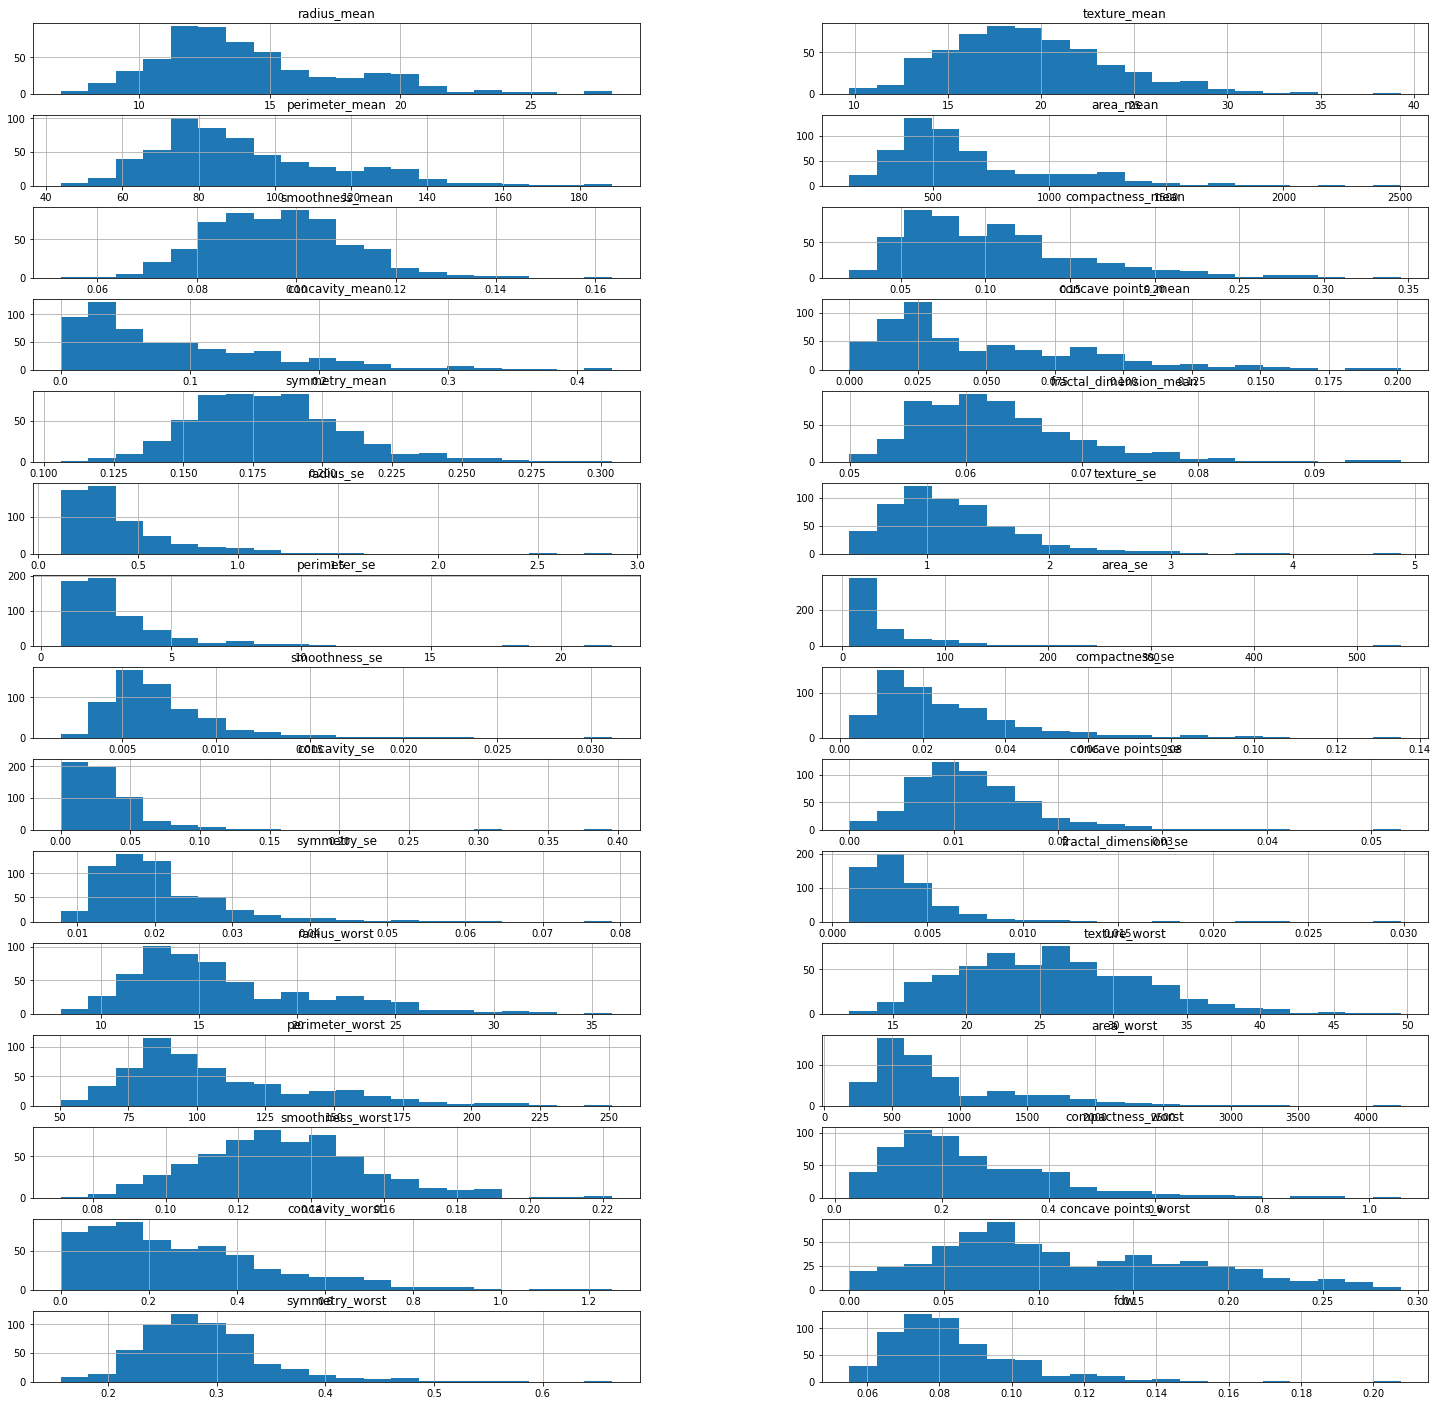

In [ ]:
# histogram (data vs frequency)
real_input.hist(figsize  = (25, 25), layout = ((real_input.columns.size+1)//2, 2), bins = 20)

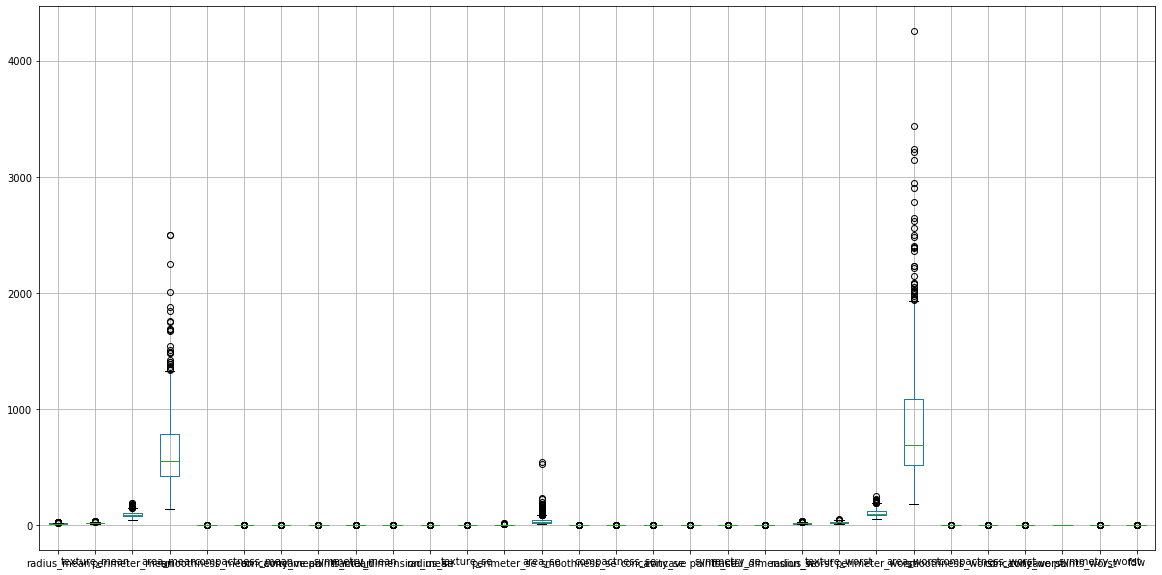

In [ ]:
# boxplot.
# boxplot will tell us about outlier data and many more but to know about outlier data 
# boxplot is great.
# to know more about boxplot please visit the link below - 
# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
real_input.boxplot(figsize = (20, 10))

In [ ]:
features = real_input.columns.values.tolist()
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fdw']

In [ ]:
# outlier detection

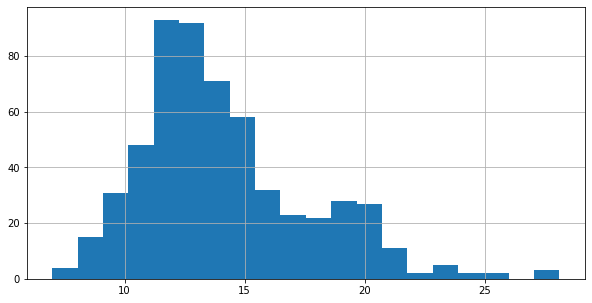

In [ ]:
j = 0 
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

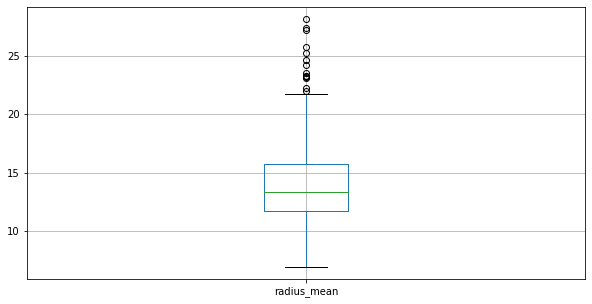

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "radius_mean",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 12) &\
                                                         (real_input[feature] <= 18) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 12) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 18)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 12) &\
                                                      (real_input[feature] <= 18) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 12) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 18].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 12)|(real_input[feature] > 18))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 12)|(real_input[feature] > 18))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature radius_mean details =


count    569.000000
mean      11.185340
std        3.451999
min        7.304286
25%        7.304286
50%       12.270000
75%       13.940000
max       17.990000
Name: radius_mean, dtype: float64

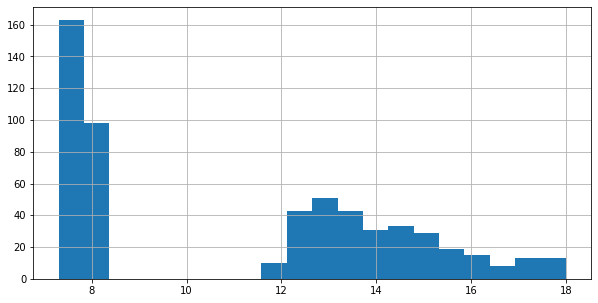

In [ ]:
'''
Feature "bu" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

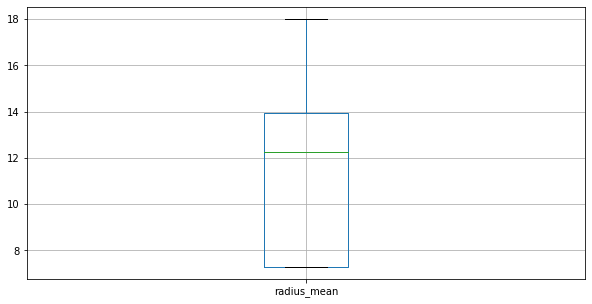

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

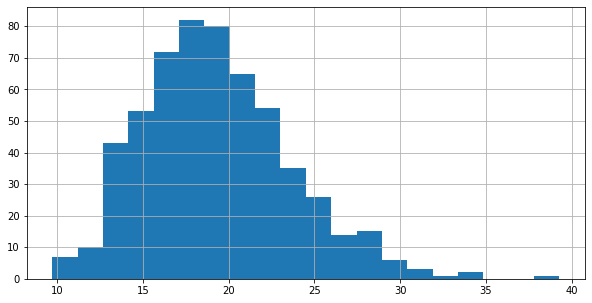

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

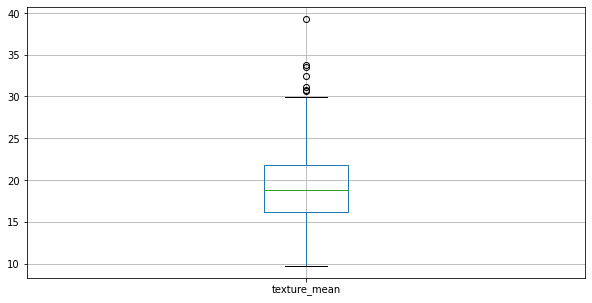

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "texture_mean",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 15) &\
                                                         (real_input[feature] <= 22) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 15) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 22)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 15) &\
                                                      (real_input[feature] <= 22) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 15) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 22].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 15)|(real_input[feature] > 22))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 15)|(real_input[feature] > 22))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature texture_mean details =


count    569.000000
mean      15.720245
std        3.849670
min       11.209151
25%       11.369440
50%       16.400000
75%       19.040000
max       21.980000
Name: texture_mean, dtype: float64

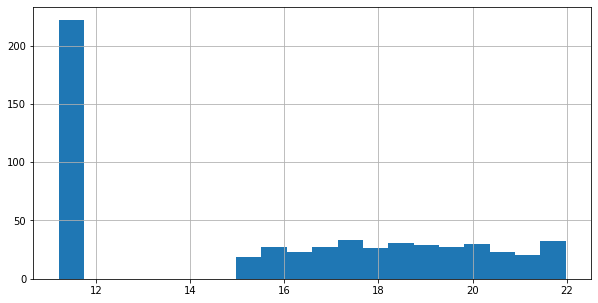

In [ ]:
'''
feature "bp" is not well distributed. 
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

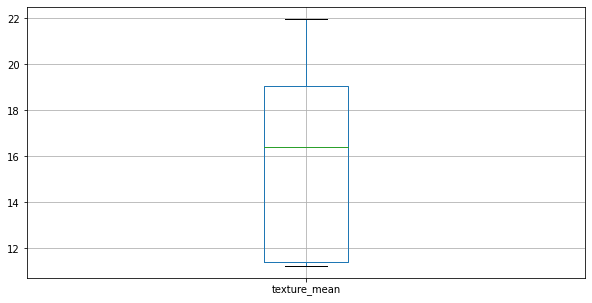

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

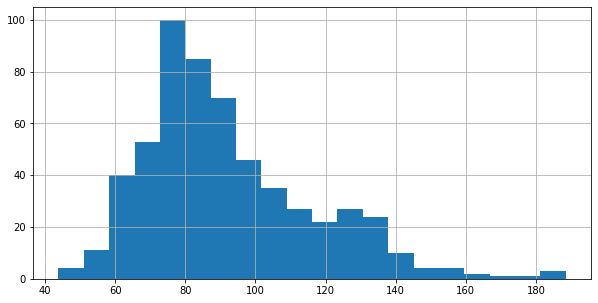

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

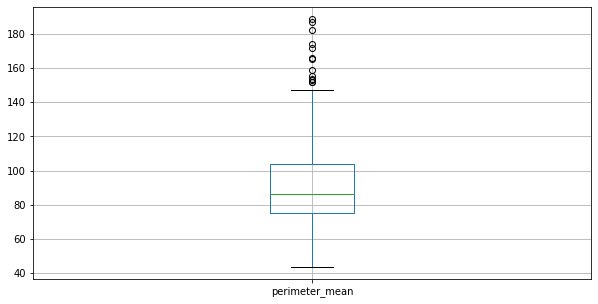

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "texture_mean",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 70) &\
                                                         (real_input[feature] <= 110) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 70) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 110)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 70) &\
                                                      (real_input[feature] <= 110) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 70) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 110].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 70)|(real_input[feature] > 110))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 70)|(real_input[feature] > 110))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature perimeter_mean details =


count    569.000000
mean      73.917940
std       19.583240
min       42.597925
25%       64.077787
50%       76.850000
75%       88.050000
max      110.000000
Name: perimeter_mean, dtype: float64

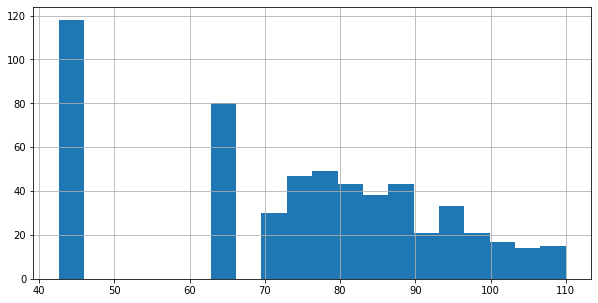

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 20)

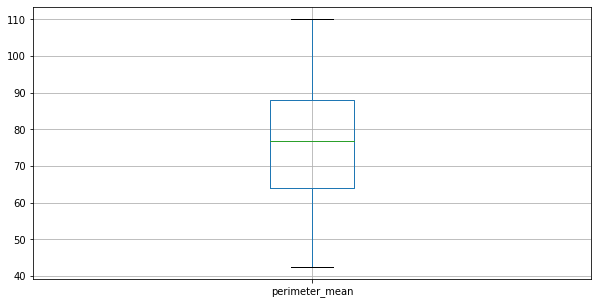

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

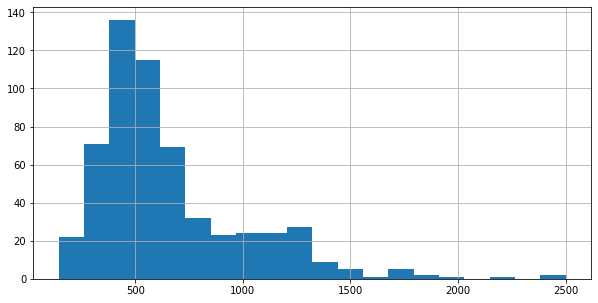

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

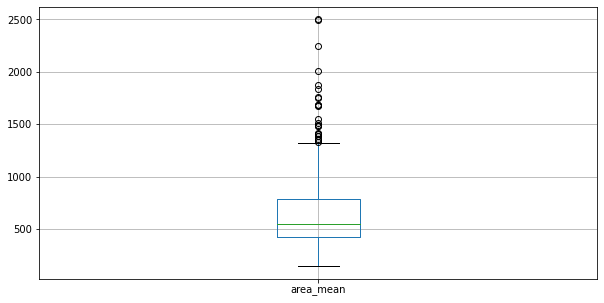

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "area_mean",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''


#real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 470) &\
                                                         (real_input[feature] <= 950) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 470) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 950)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 470) &\
                                                      (real_input[feature] <= 950) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 470) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 950].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 470)|(real_input[feature] > 950))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 470)|(real_input[feature] > 950))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature area_mean details =


count    569.000000
mean     448.001681
std      193.274083
min      257.725210
25%      257.725210
50%      348.521698
75%      585.900000
max      948.000000
Name: area_mean, dtype: float64

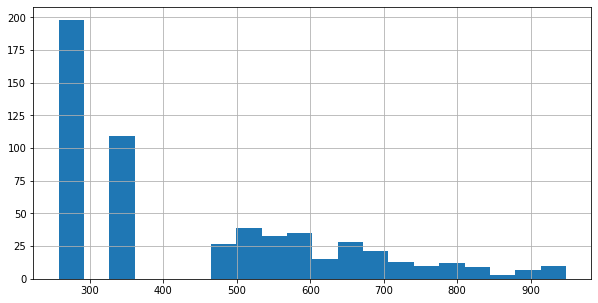

In [ ]:
'''
Feature "area_mean" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

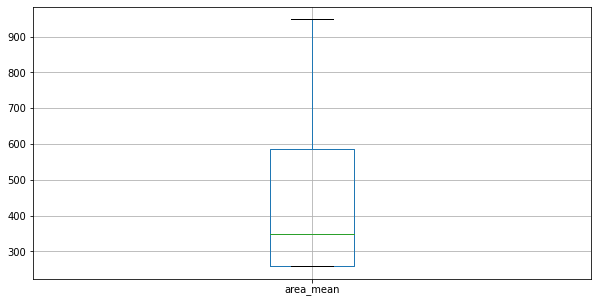

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

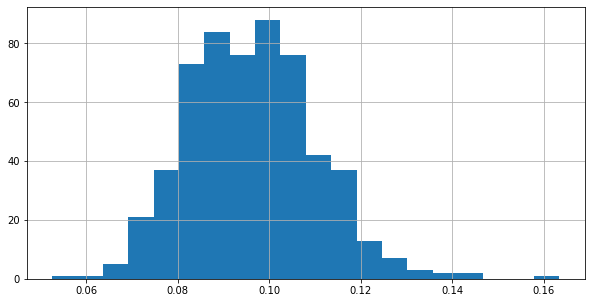

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

/usr/local/lib/python3.6/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


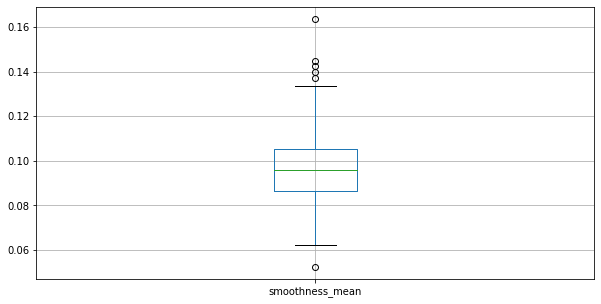

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "smoothness_mean",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.09, other = 0.09)


# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.09) &\
                                                         (real_input[feature] <= 0.105) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.09) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.105)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.09) &\
                                                      (real_input[feature] <= 0.105) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.09) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.105].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.09)|(real_input[feature] > 0.105))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.09)|(real_input[feature] > 0.105))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature smoothness_mean details =


count    569.000000
mean       0.086710
std        0.013935
min        0.057480
25%        0.077193
50%        0.090000
75%        0.095660
max        0.104900
Name: smoothness_mean, dtype: float64

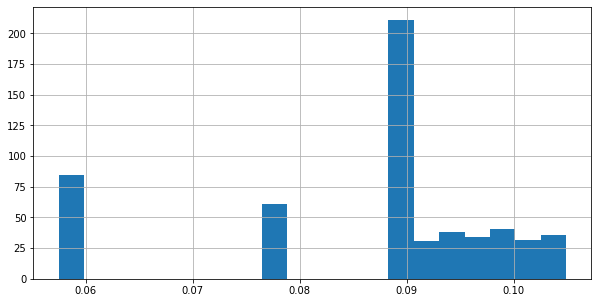

In [ ]:
'''
Feature "chol" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

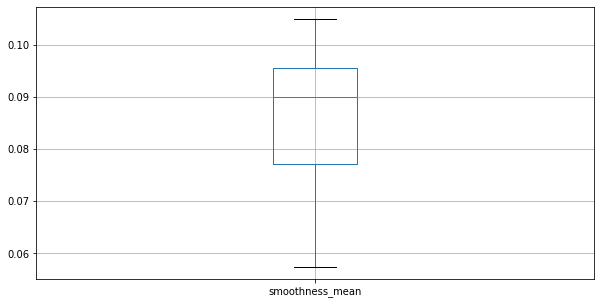

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

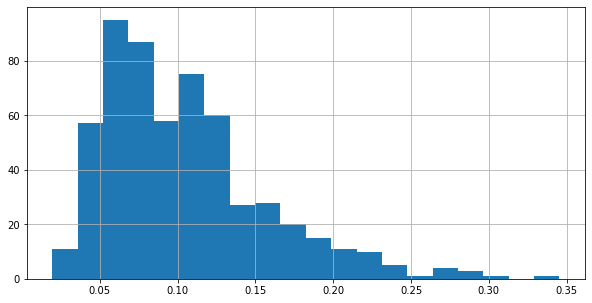

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

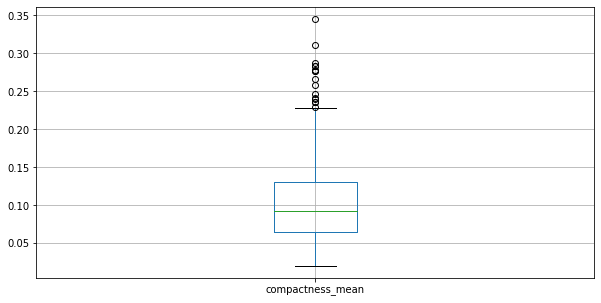

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "compactness_mean",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.08, other = 0.08)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.15, other = 0.15)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.08) &\
                                                         (real_input[feature] <= 0.15) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.08) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.15)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.08) &\
                                                      (real_input[feature] <= 0.15) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.08) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.15].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.08)|(real_input[feature] > 0.15))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.08)|(real_input[feature] > 0.15))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature compactness_mean details =


count    569.000000
mean       0.105131
std        0.027734
min        0.080000
25%        0.080000
50%        0.092630
75%        0.130400
max        0.150000
Name: compactness_mean, dtype: float64

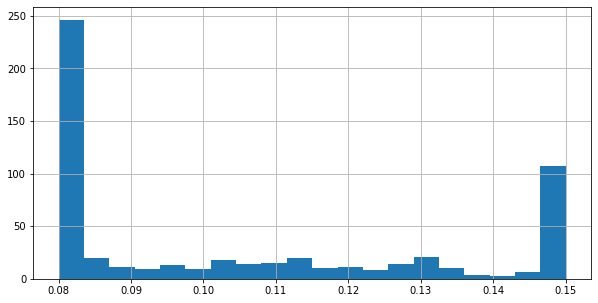

In [ ]:
'''
Feature "chol" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

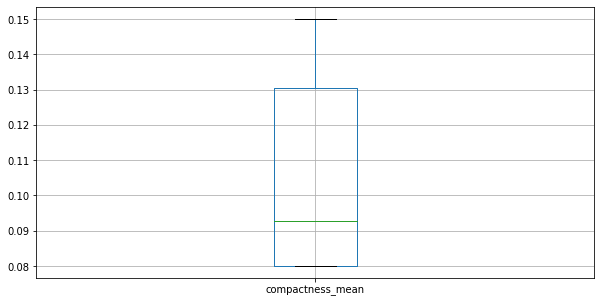

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

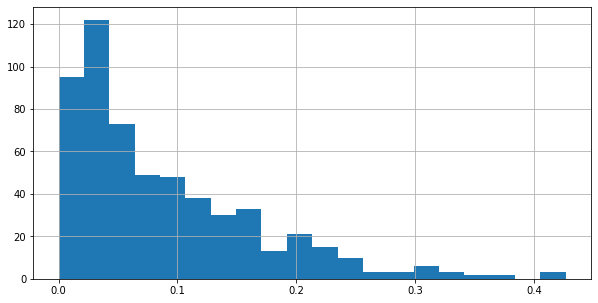

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

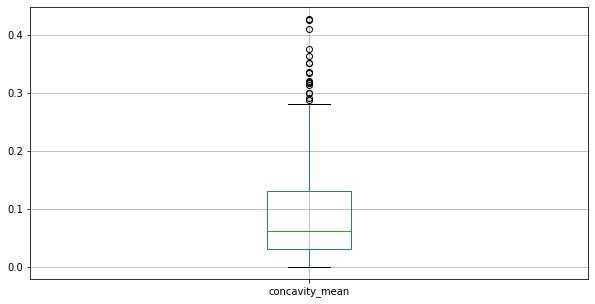

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "concavity mean",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''

#real_input[feature] = real_input[feature].mask(real_input[feature] < 1., other = 1.)
real_input[feature] = real_input[feature].mask(real_input[feature] < 0.07, other = 0.07)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.15, other = 0.15)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.07) &\
                                                         (real_input[feature] <= 0.15) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.07) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.15)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.07) &\
                                                      (real_input[feature] <= 0.15) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.07) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.15].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.07)|(real_input[feature] > 0.15))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.07)|(real_input[feature] > 0.15))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature concavity_mean details =


count    569.000000
mean       0.095428
std        0.033253
min        0.070000
25%        0.070000
50%        0.070000
75%        0.130700
max        0.150000
Name: concavity_mean, dtype: float64

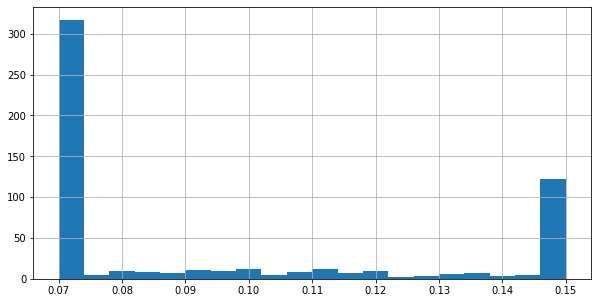

In [ ]:
'''
Feature "hemo" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 20)

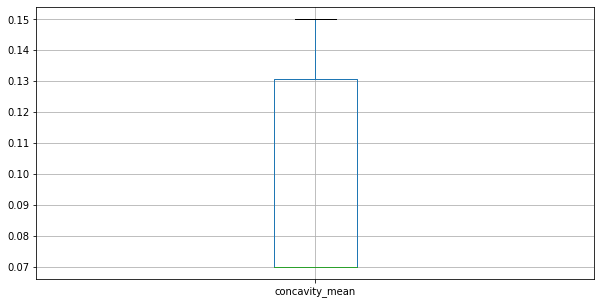

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

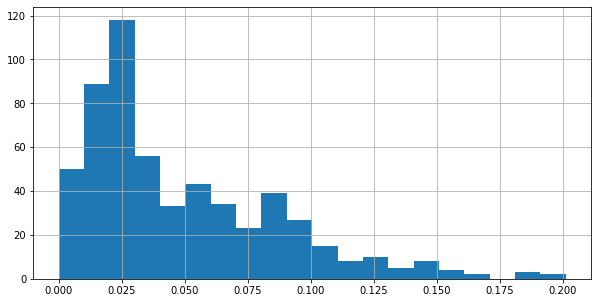

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

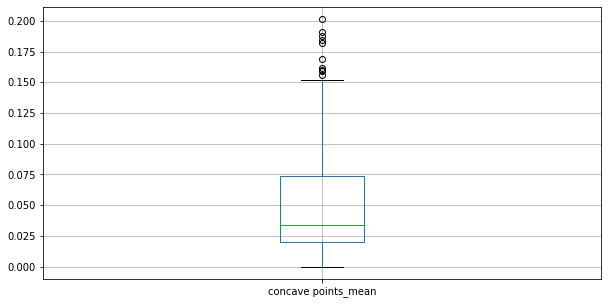

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "concavepoints_mean",
outliers found in both histogram and boxplot
Set "weight" < 80 = 80 and "weight" > 200 = 200
'''

#real_input[feature] = real_input[feature].mask(real_input[feature] < 55., other = 55.)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.100, other = 0.100)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.021) &\
                                                         (real_input[feature] <= 0.100) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.021) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.100)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.021) &\
                                                      (real_input[feature] <= 0.100) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.021) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.100].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.021)|(real_input[feature] > 0.100))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.021)|(real_input[feature] > 0.100))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature concave points_mean details =


count    569.000000
mean       0.051479
std        0.026332
min        0.021000
25%        0.033558
50%        0.033700
75%        0.074040
max        0.100000
Name: concave points_mean, dtype: float64

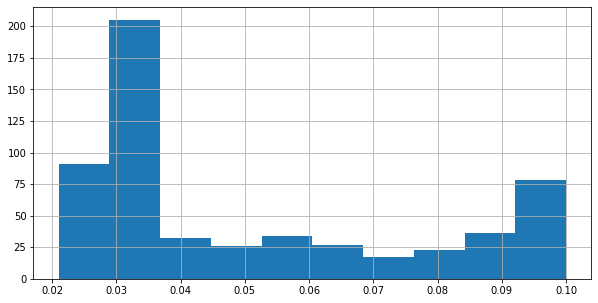

In [ ]:
'''
Feature "thalach" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

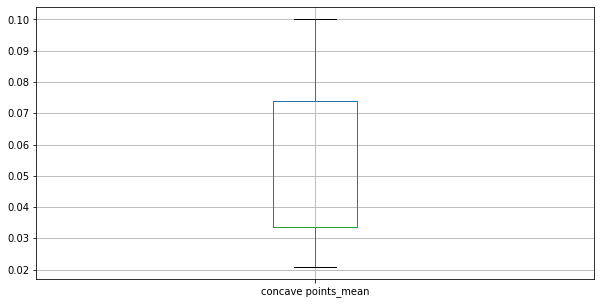

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

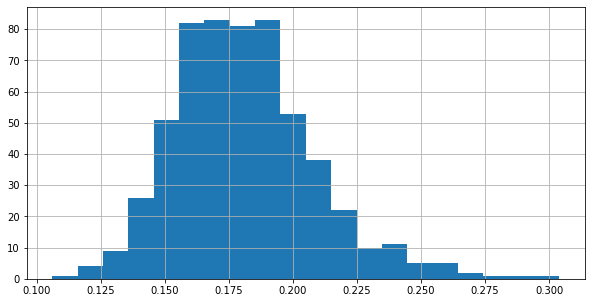

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

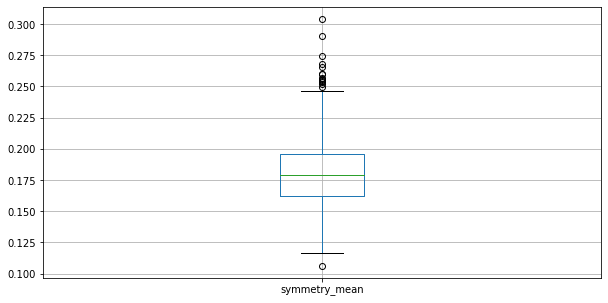

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "concavepoints_mean",
outliers found in both histogram and boxplot
Set "weight" < 80 = 80 and "weight" > 200 = 200
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.150, other = 0.150)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.200, other = 0.200)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.150) &\
                                                         (real_input[feature] <= 0.200) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.150) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.200)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.150) &\
                                                      (real_input[feature] <= 0.200) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.150) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.200].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.150)|(real_input[feature] > 0.200))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.150)|(real_input[feature] > 0.200))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature symmetry_mean details =


count    569.000000
mean       0.177838
std        0.017765
min        0.150000
25%        0.161900
50%        0.179200
75%        0.195700
max        0.200000
Name: symmetry_mean, dtype: float64

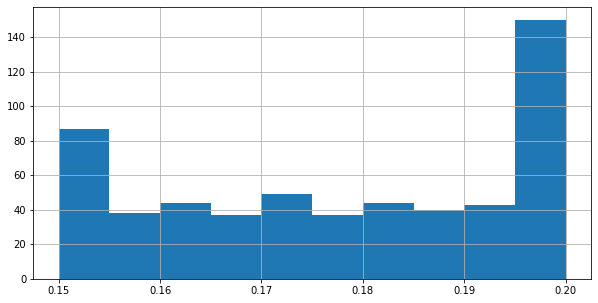

In [ ]:
'''
Feature "thalach" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

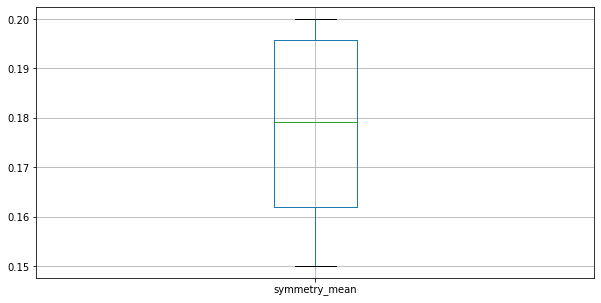

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

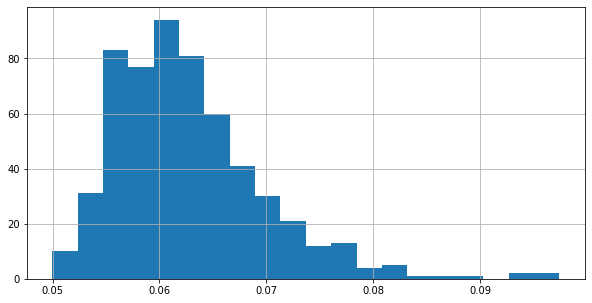

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

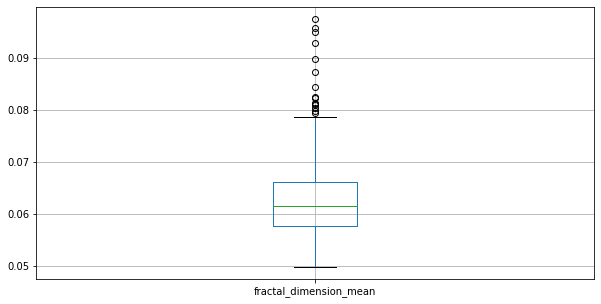

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "FRACTAL_DIMENSION_MEAN",
outliers found in both histogram and boxplot
Set "weight" < 80 = 80 and "weight" > 200 = 200
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.055, other = 0.055)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.07, other = 0.07)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.055) &\
                                                         (real_input[feature] <= 0.07) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.55) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.07)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.055) &\
                                                      (real_input[feature] <= 0.07) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.055) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.07].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.055)|(real_input[feature] > 0.07))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.055)|(real_input[feature] > 0.07))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature fractal_dimension_mean details =


count    569.000000
mean       0.062125
std        0.004983
min        0.055000
25%        0.057700
50%        0.061540
75%        0.066120
max        0.070000
Name: fractal_dimension_mean, dtype: float64

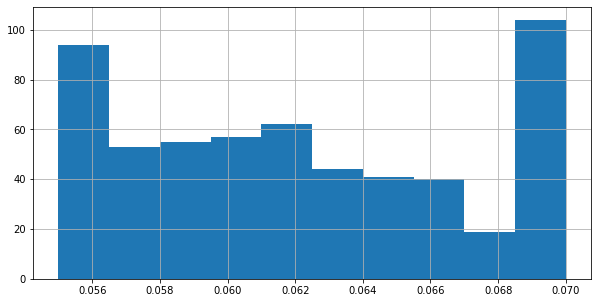

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

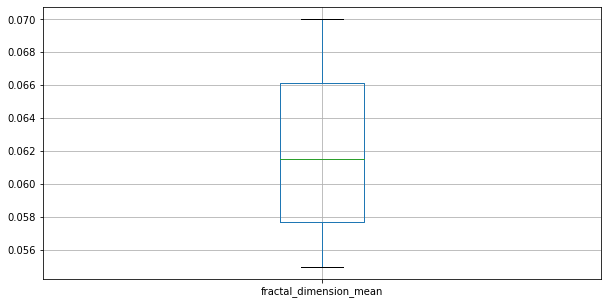

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

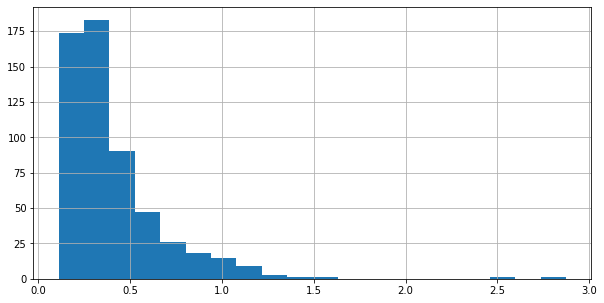

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

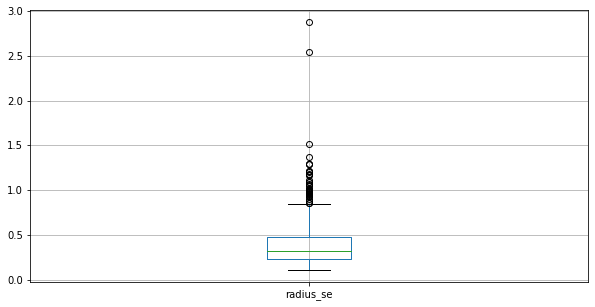

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "radius_se",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

real_input[feature] = real_input[feature].mask(real_input[feature] > 0.5, other = 0.5)
#real_input[feature] = real_input[feature].mask(real_input[feature] > 105., other = 105.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.02) &\
                                                         (real_input[feature] <= 0.5) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.02) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.5)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.02) &\
                                                      (real_input[feature] <= 0.5) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.02) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.5].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.02)|(real_input[feature] > 0.5))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.02)|(real_input[feature] > 0.5))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature radius_se details =


count    569.000000
mean       0.337083
std        0.121676
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        0.500000
Name: radius_se, dtype: float64

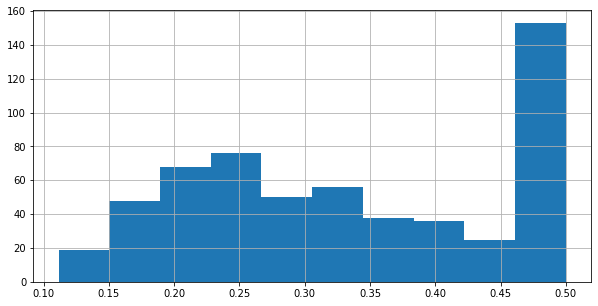

In [ ]:
'''
Feature "weight" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

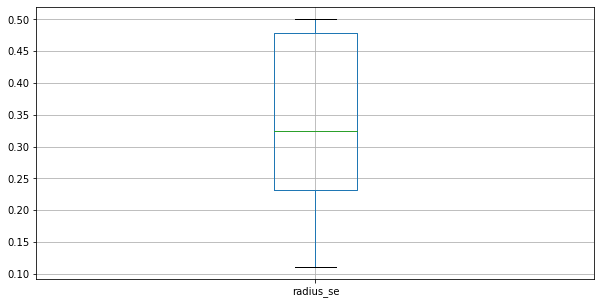

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

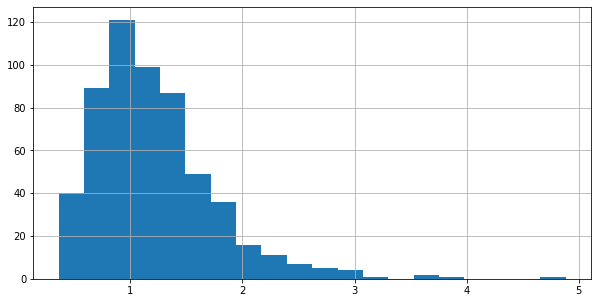

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

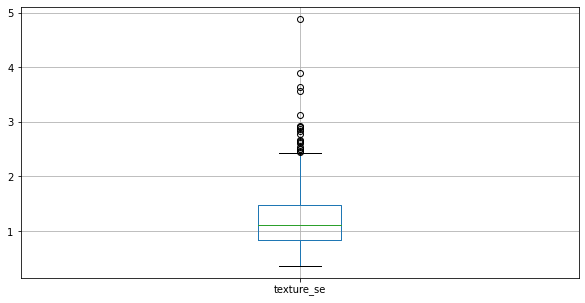

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "texture_se",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

#real_input[feature] = real_input[feature].mask(real_input[feature] > 0.5, other = 0.5)
real_input[feature] = real_input[feature].mask(real_input[feature] > 2, other = 2)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.8) &\
                                                         (real_input[feature] <= 2) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.8) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 2)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.8) &\
                                                      (real_input[feature] <= 2) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.8) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 2].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.8)|(real_input[feature] > 2))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.8)|(real_input[feature] > 2))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature texture_se details =


count    569.000000
mean       1.262864
std        0.347246
min        0.807300
25%        1.015966
50%        1.108000
75%        1.474000
max        2.000000
Name: texture_se, dtype: float64

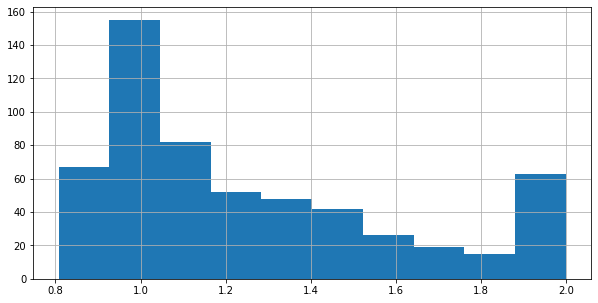

In [ ]:
'''
Feature "weight" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

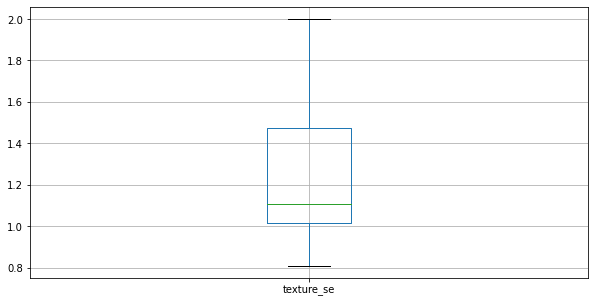

In [ ]:
 real_input.boxplot(column = feature, figsize = (10, 5))

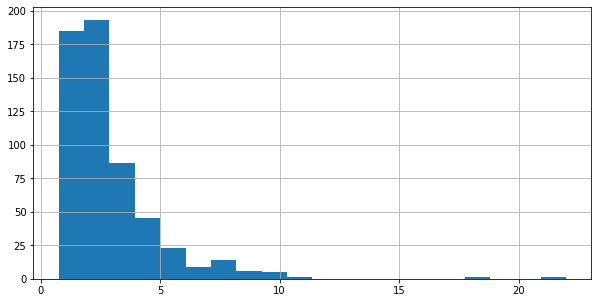

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

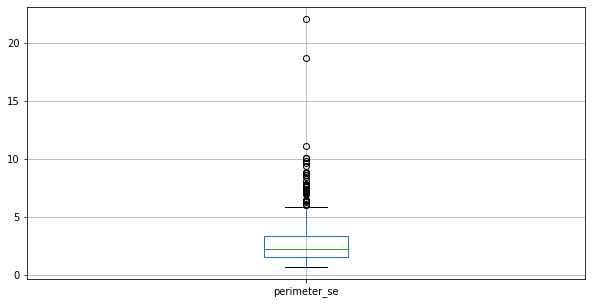

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "parameter_se",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

real_input[feature] = real_input[feature].mask(real_input[feature] > 4, other = 4)
#real_input[feature] = real_input[feature].mask(real_input[feature] > 105., other = 105.)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.05) &\
                                                         (real_input[feature] <= 3.5) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.5) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 3.5)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.5) &\
                                                      (real_input[feature] <= 3.5) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.5) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 3.5].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.5)|(real_input[feature] > 3.5))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.5)|(real_input[feature] > 3.5))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature perimeter_se details =


count    569.000000
mean       1.869046
std        0.672792
min        0.757000
25%        1.197986
50%        1.742000
75%        2.347000
max        3.498000
Name: perimeter_se, dtype: float64

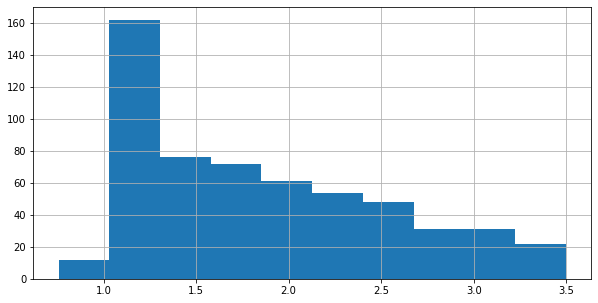

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

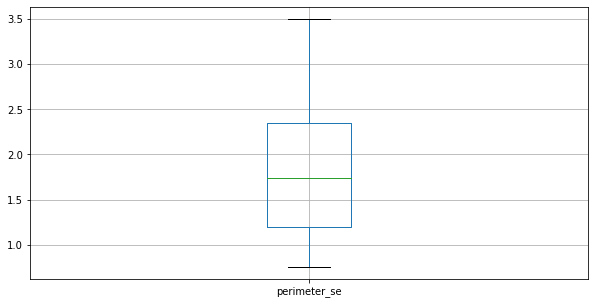

In [ ]:
 real_input.boxplot(column = feature, figsize = (10, 5))

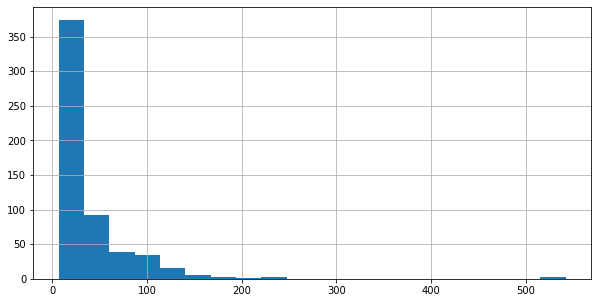

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

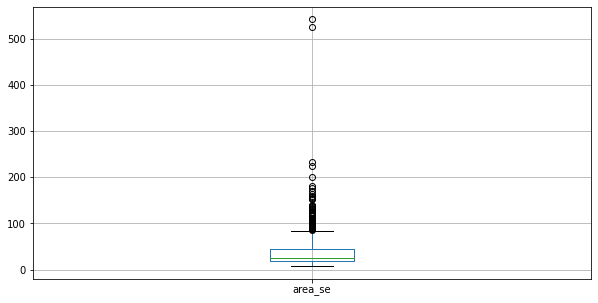

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "area_se",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 10, other = 10)
real_input[feature] = real_input[feature].mask(real_input[feature] > 80, other = 80)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 10) &\
                                                         (real_input[feature] <= 80) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 10) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 80)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 10) &\
                                                      (real_input[feature] <= 80) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 10) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 80].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 10)|(real_input[feature] > 80))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 10)|(real_input[feature] > 80))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature area_se details =


count    569.000000
mean      34.268858
std       22.743242
min       10.000000
25%       17.850000
50%       24.530000
75%       45.190000
max       80.000000
Name: area_se, dtype: float64

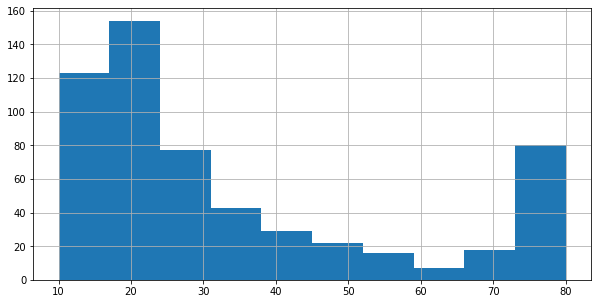

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

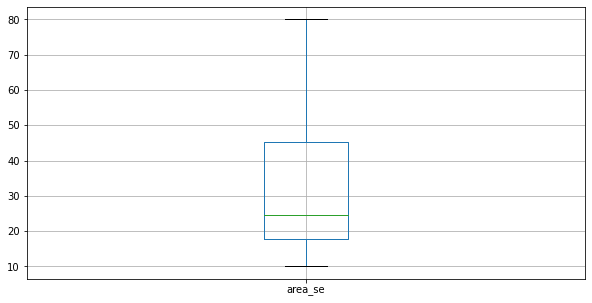

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

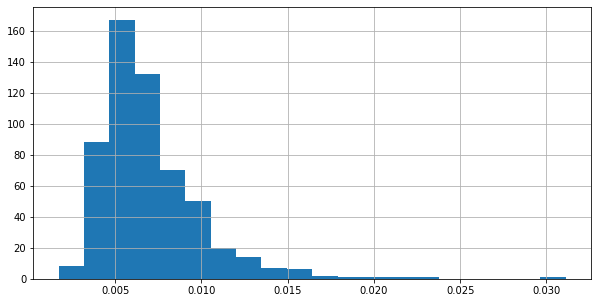

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

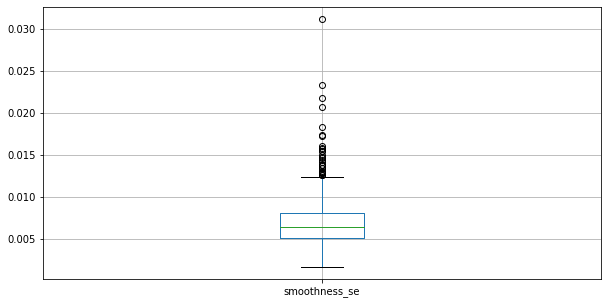

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "smoothness_se",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.005, other = 0.005)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.010, other = 0.010)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.005) &\
                                                         (real_input[feature] <= 0.010) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.005) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.010)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.005) &\
                                                      (real_input[feature] <= 0.010) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.005) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.010].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.005)|(real_input[feature] > 0.010))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.005)|(real_input[feature] > 0.010))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature smoothness_se details =


count    569.000000
mean       0.006858
std        0.001775
min        0.005000
25%        0.005169
50%        0.006380
75%        0.008146
max        0.010000
Name: smoothness_se, dtype: float64

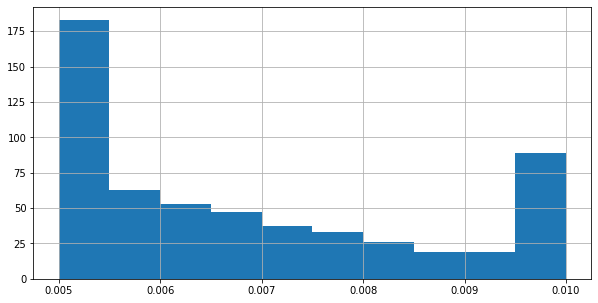

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

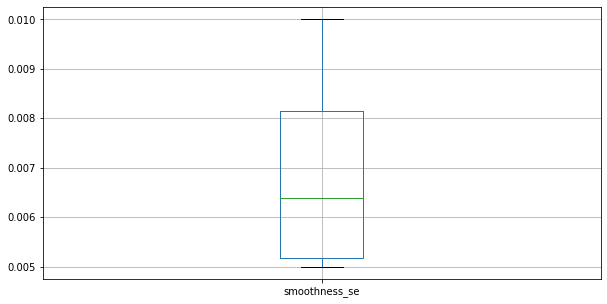

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

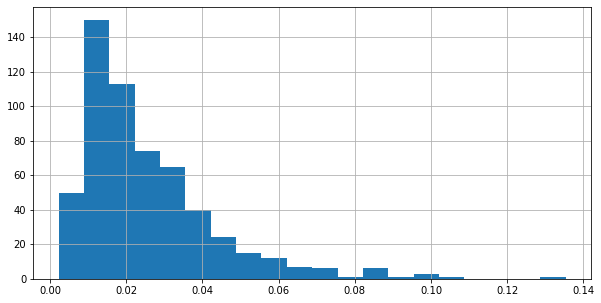

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

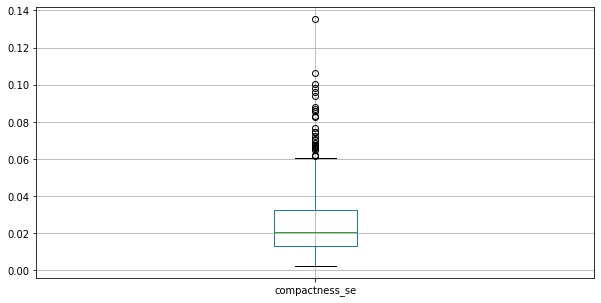

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "compactness_se",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

#real_input[feature] = real_input[feature].mask(real_input[feature] > 0.5, other = 0.5)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.05, other = 0.05)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.01) &\
                                                         (real_input[feature] <= 0.05) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.01) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.05)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.01) &\
                                                      (real_input[feature] <= 0.05) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.01) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.05].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.01)|(real_input[feature] > 0.05))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.01)|(real_input[feature] > 0.05))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature compactness_se details =


count    569.000000
mean       0.025791
std        0.011775
min        0.010030
25%        0.016310
50%        0.023142
75%        0.032450
max        0.050000
Name: compactness_se, dtype: float64

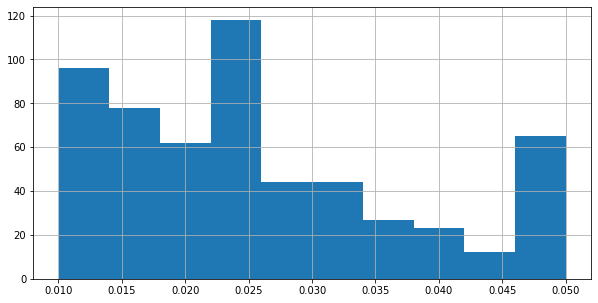

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

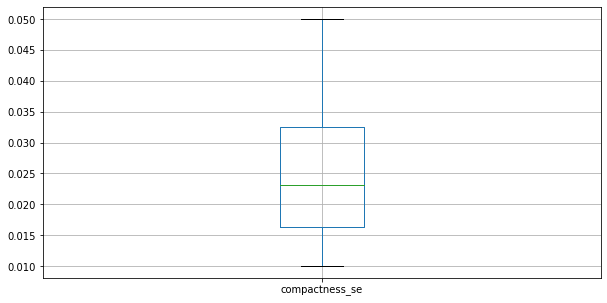

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

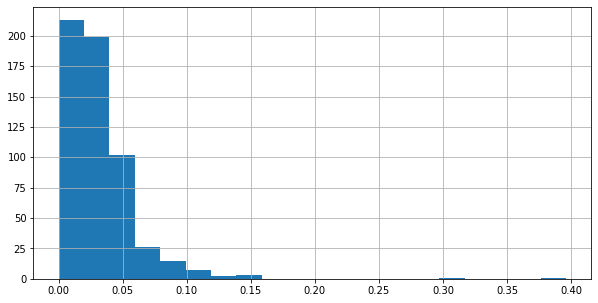

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

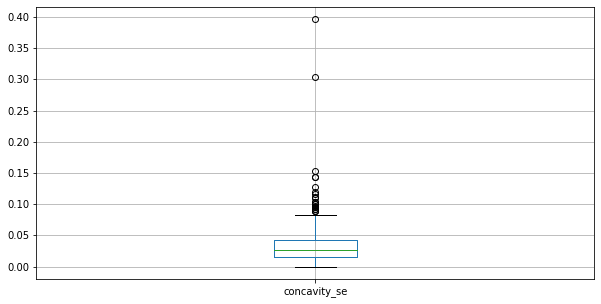

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "concativity_se",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.01, other = 0.01)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.07, other = 0.07)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.01) &\
                                                         (real_input[feature] <= 0.07) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.01) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.07)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.01) &\
                                                      (real_input[feature] <= 0.07) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.01) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.07].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.01)|(real_input[feature] > 0.07))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.01)|(real_input[feature] > 0.07))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature concavity_se details =


count    569.000000
mean       0.030039
std        0.018052
min        0.010000
25%        0.015090
50%        0.025890
75%        0.042050
max        0.070000
Name: concavity_se, dtype: float64

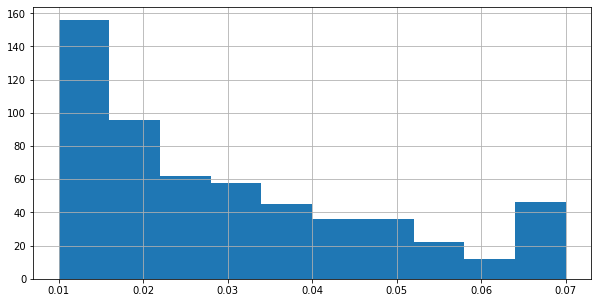

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

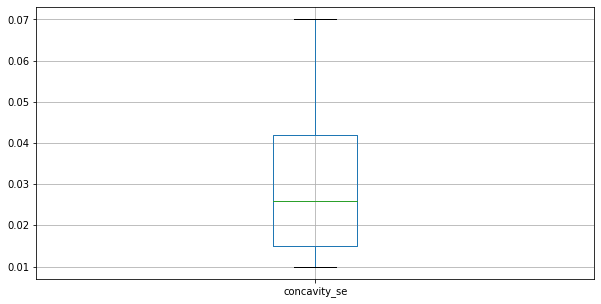

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

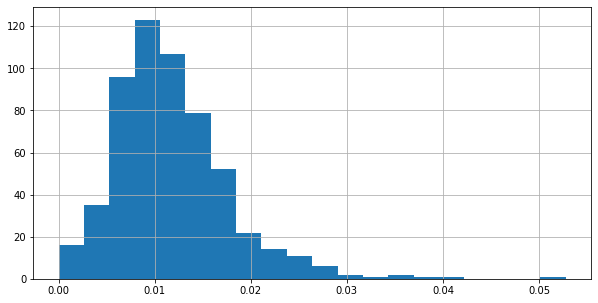

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

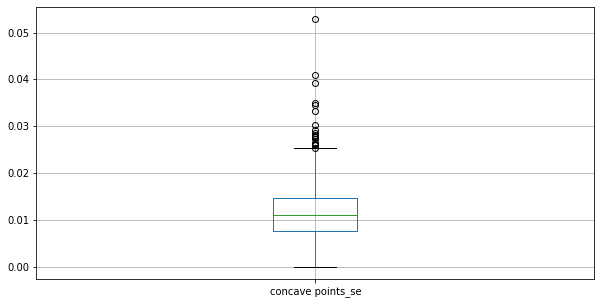

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "CONCAVEPOINT_se",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.005, other = 0.005)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.02, other = 0.02)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.005) &\
                                                         (real_input[feature] <= 0.02) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.005) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.02)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.005) &\
                                                      (real_input[feature] <= 0.02) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.005) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.02].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.005)|(real_input[feature] > 0.02))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.005)|(real_input[feature] > 0.02))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature concave points_se details =


count    569.000000
mean       0.011490
std        0.004572
min        0.005000
25%        0.007638
50%        0.010930
75%        0.014710
max        0.020000
Name: concave points_se, dtype: float64

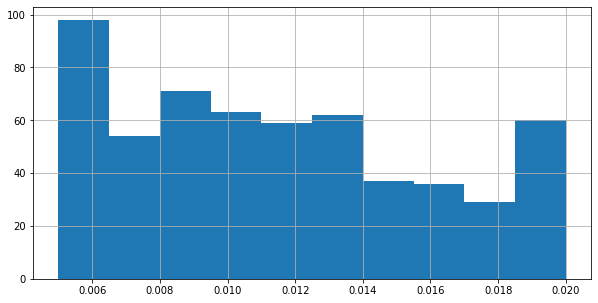

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

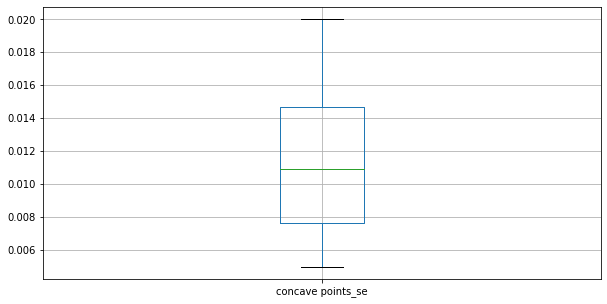

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

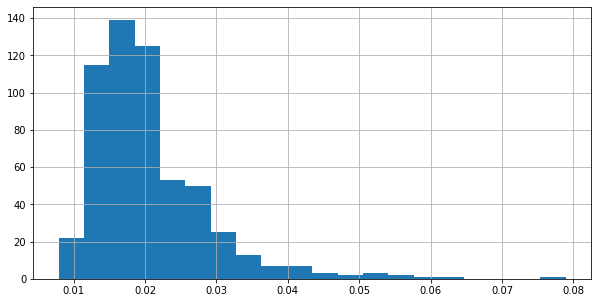

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

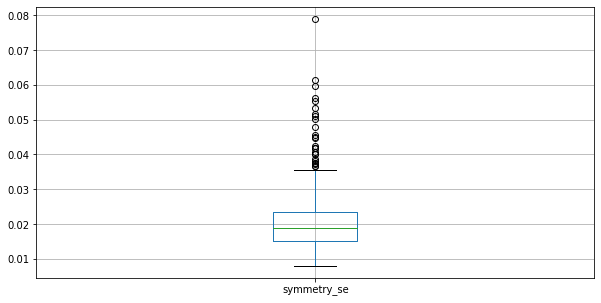

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "symmetry_se",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.015, other = 0.015)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.03, other = 0.03)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.015) &\
                                                         (real_input[feature] <= 0.03) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.015) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.03)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.015) &\
                                                      (real_input[feature] <= 0.03) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.015) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.03].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.015)|(real_input[feature] > 0.03))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.015)|(real_input[feature] > 0.03))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature symmetry_se details =


count    569.000000
mean       0.020096
std        0.005133
min        0.015000
25%        0.015160
50%        0.018730
75%        0.023480
max        0.030000
Name: symmetry_se, dtype: float64

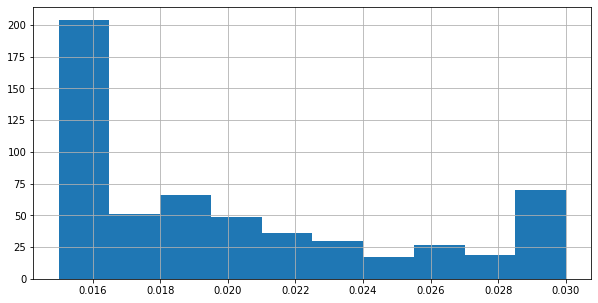

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

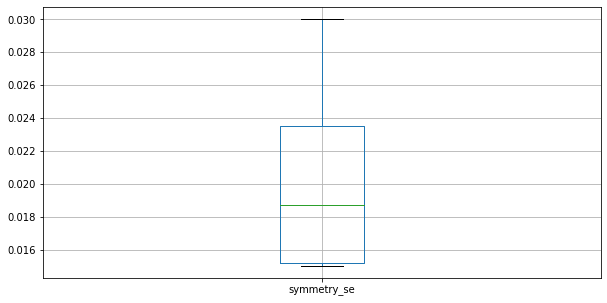

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

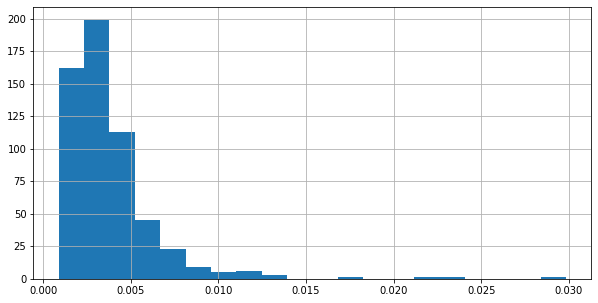

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

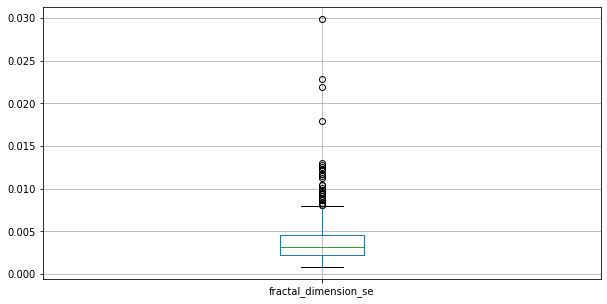

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "fractal_dimension_se",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.002, other = 0.002)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.007, other = 0.007)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.002) &\
                                                         (real_input[feature] <= 0.007) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.002) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.007)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.002) &\
                                                      (real_input[feature] <= 0.007) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.002) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.007].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.002)|(real_input[feature] > 0.007))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.002)|(real_input[feature] > 0.007))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature fractal_dimension_se details =


count    569.000000
mean       0.003595
std        0.001559
min        0.002000
25%        0.002248
50%        0.003187
75%        0.004558
max        0.007000
Name: fractal_dimension_se, dtype: float64

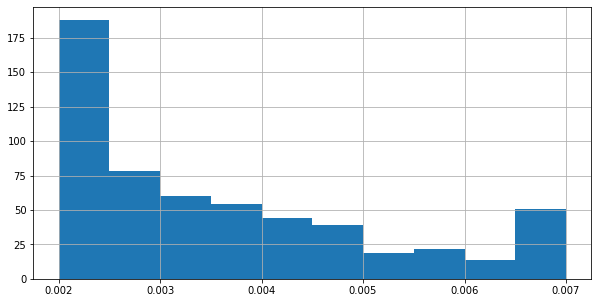

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

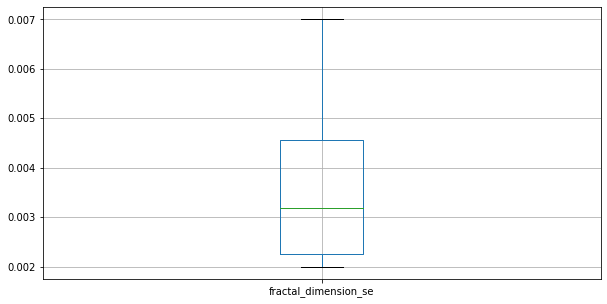

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

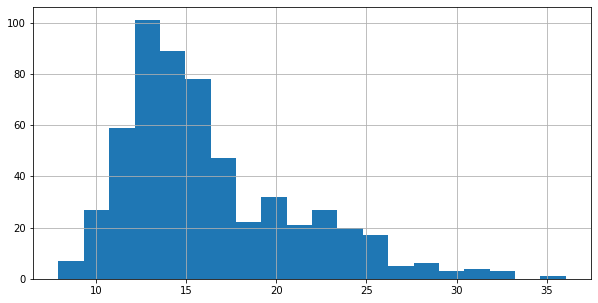

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

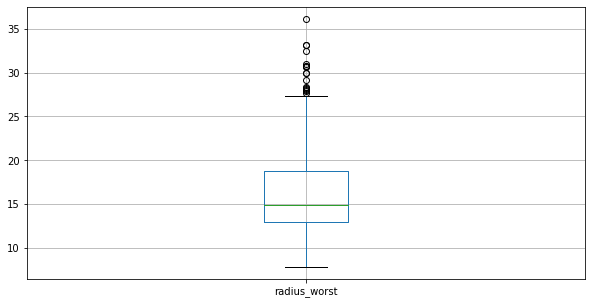

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "radius_worst",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

#real_input[feature] = real_input[feature].mask(real_input[feature] < 0.002, other = 0.002)
real_input[feature] = real_input[feature].mask(real_input[feature] > 25, other = 25)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 10) &\
                                                         (real_input[feature] <= 25) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 10) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 25)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 10) &\
                                                      (real_input[feature] <= 25) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 10) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 25].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 10)|(real_input[feature] > 25))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 10)|(real_input[feature] > 25))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature radius_worst details =


count    569.000000
mean      16.197650
std        4.220099
min       10.010000
25%       13.010000
50%       14.970000
75%       18.790000
max       25.000000
Name: radius_worst, dtype: float64

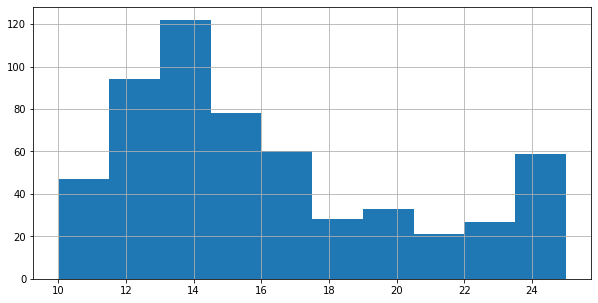

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

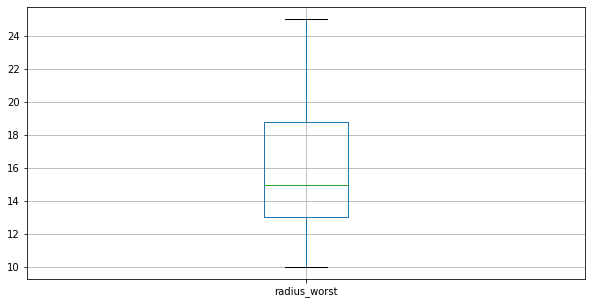

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

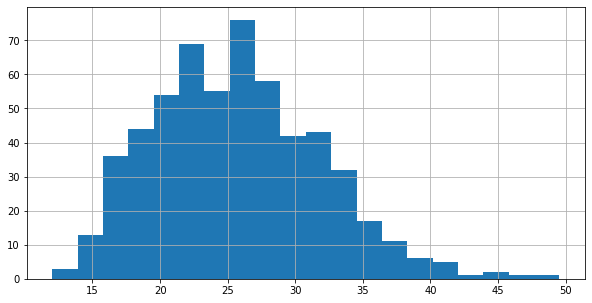

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

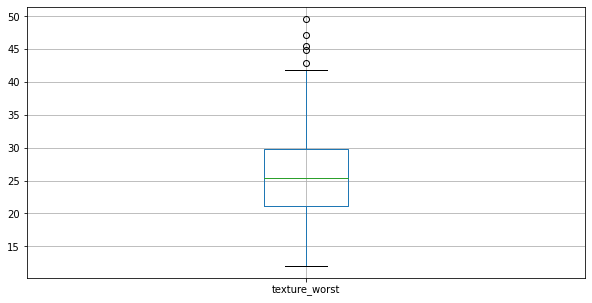

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "texture_worst",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

#real_input[feature] = real_input[feature].mask(real_input[feature] < 0.002, other = 0.002)
#real_input[feature] = real_input[feature].mask(real_input[feature] > 0.007, other = 0.007)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 15) &\
                                                         (real_input[feature] <= 35) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 15) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 35)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 15) &\
                                                      (real_input[feature] <= 35) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 15) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 35].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 15)|(real_input[feature] > 35))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 15)|(real_input[feature] > 35))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature texture_worst details =


count    569.000000
mean      24.706420
std        4.819519
min       15.380000
25%       21.380000
50%       24.704434
75%       28.070000
max       34.910000
Name: texture_worst, dtype: float64

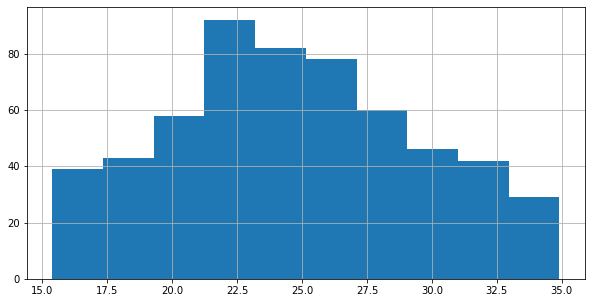

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

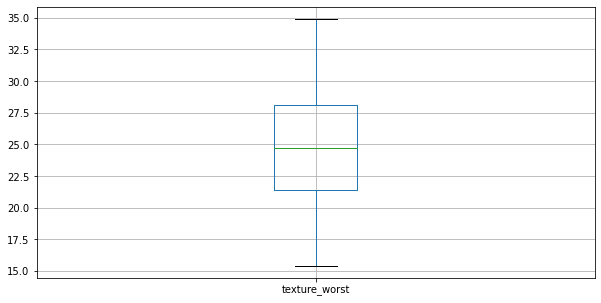

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

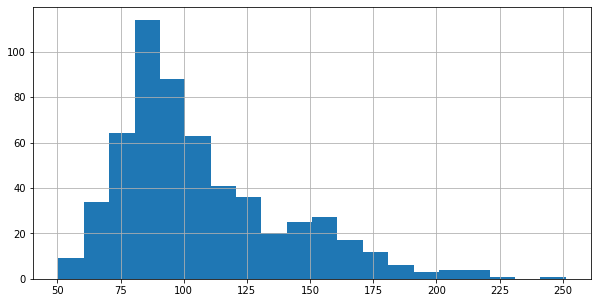

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

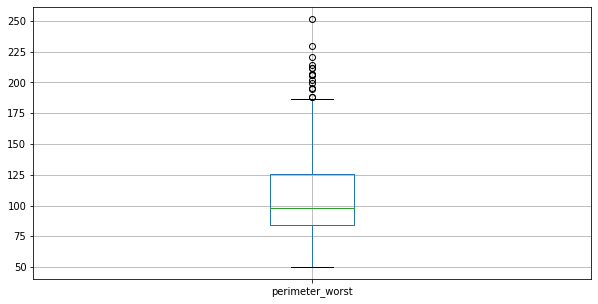

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "perimeter_worst",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

#real_input[feature] = real_input[feature].mask(real_input[feature] < 0.002, other = 0.002)
real_input[feature] = real_input[feature].mask(real_input[feature] > 150, other = 150)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 75) &\
                                                         (real_input[feature] <= 150) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 75) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 150)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 75) &\
                                                      (real_input[feature] <= 150) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 75) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 150].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 75)|(real_input[feature] > 150))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 75)|(real_input[feature] > 150))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature perimeter_worst details =


count    569.000000
mean     104.975030
std       25.942280
min       73.767171
25%       84.110000
50%       97.660000
75%      125.400000
max      150.000000
Name: perimeter_worst, dtype: float64

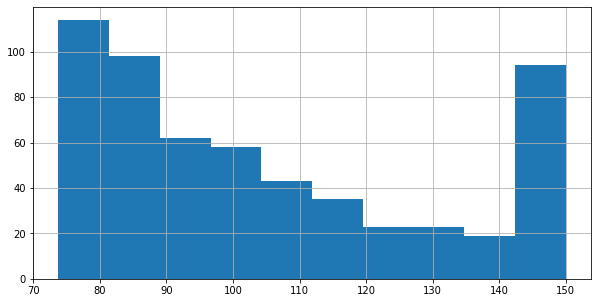

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

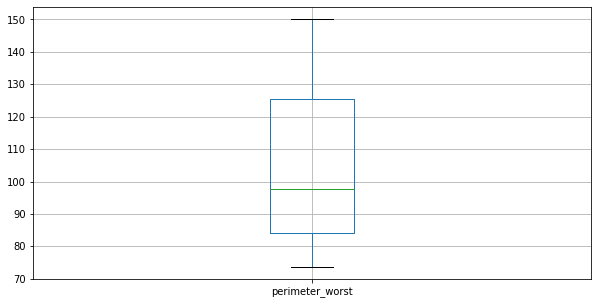

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

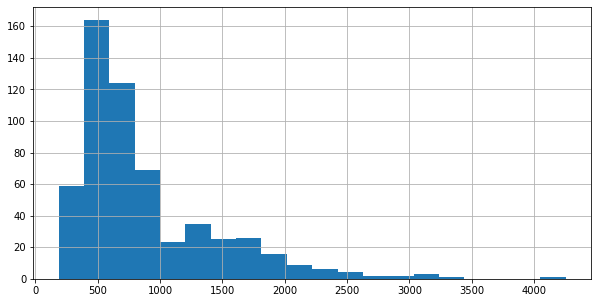

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

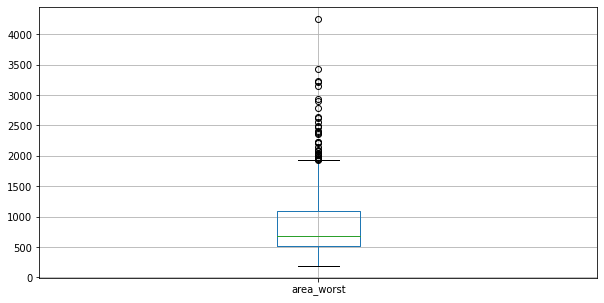

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "area_worst",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

#real_input[feature] = real_input[feature].mask(real_input[feature] < 0.002, other = 0.002)
real_input[feature] = real_input[feature].mask(real_input[feature] > 1700, other = 1700)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 300) &\
                                                         (real_input[feature] <= 1700) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 300) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 1700)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 300) &\
                                                      (real_input[feature] <= 1700) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 300) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 1700].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 300)|(real_input[feature] > 1700))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 300)|(real_input[feature] > 1700))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature area_worst details =


count     569.000000
mean      840.357628
std       428.779080
min       300.200000
25%       527.800000
50%       686.500000
75%      1084.000000
max      1700.000000
Name: area_worst, dtype: float64

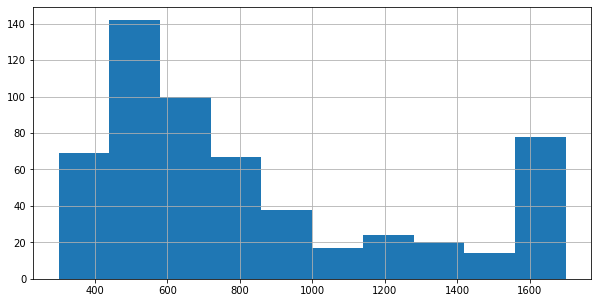

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

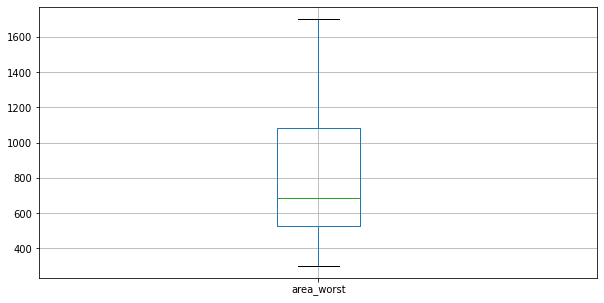

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

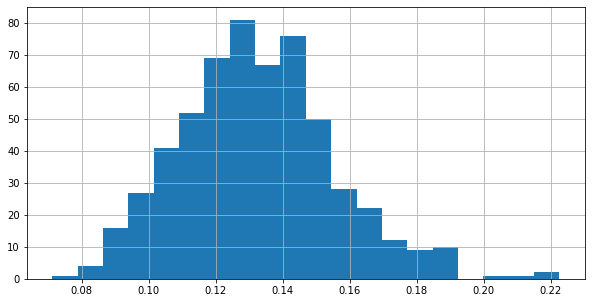

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

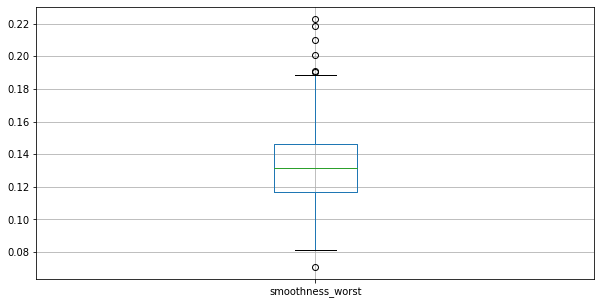

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "smoothness_worst",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.10, other = 0.10)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.16, other = 0.16)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.10) &\
                                                         (real_input[feature] <= 0.16) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.10) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.16)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.10) &\
                                                      (real_input[feature] <= 0.16) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.10) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.16].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.10)|(real_input[feature] > 0.16))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.10)|(real_input[feature] > 0.16))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature smoothness_worst details =


count    569.000000
mean       0.131280
std        0.018682
min        0.100000
25%        0.116600
50%        0.131300
75%        0.146000
max        0.160000
Name: smoothness_worst, dtype: float64

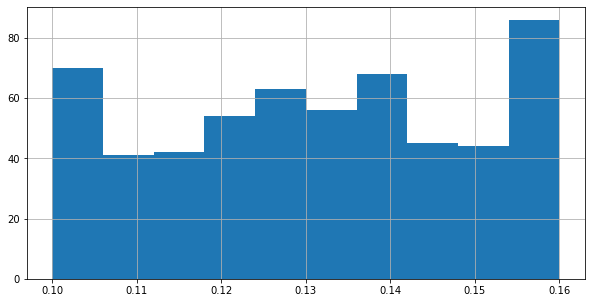

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

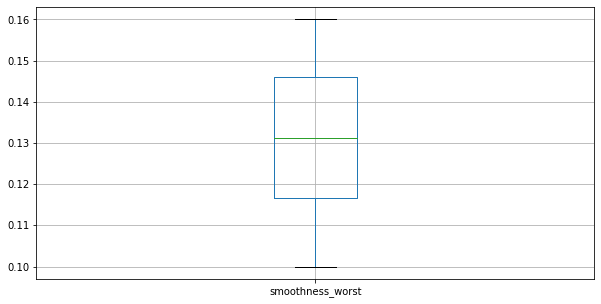

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

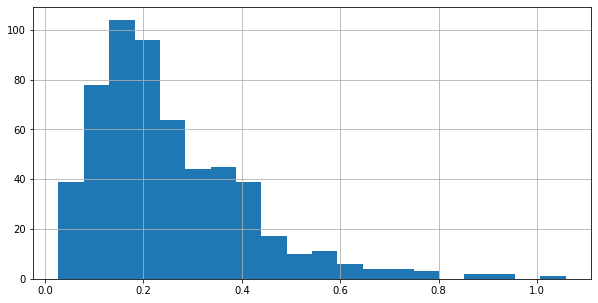

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

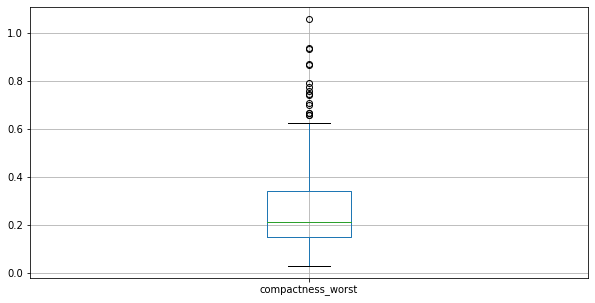

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "compactness_worst",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

#real_input[feature] = real_input[feature].mask(real_input[feature] < 0.002, other = 0.002)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.4, other = 0.4)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.1) &\
                                                         (real_input[feature] <= 0.4) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.1) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.4)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.1) &\
                                                      (real_input[feature] <= 0.4) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.1) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.4].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.1)|(real_input[feature] > 0.4))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.1)|(real_input[feature] > 0.4))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature compactness_worst details =


count    569.000000
mean       0.249727
std        0.094415
min        0.100000
25%        0.179200
50%        0.215800
75%        0.339100
max        0.400000
Name: compactness_worst, dtype: float64

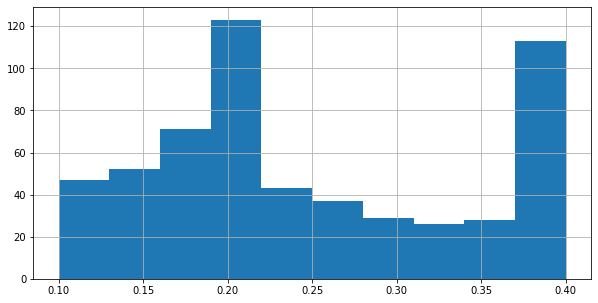

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

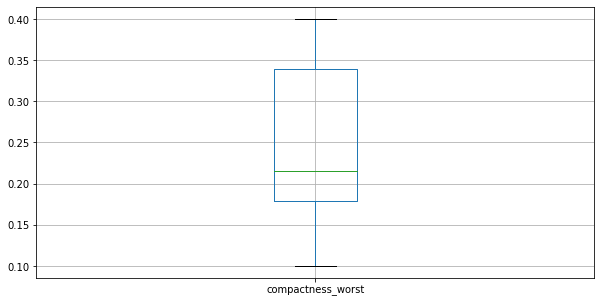

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

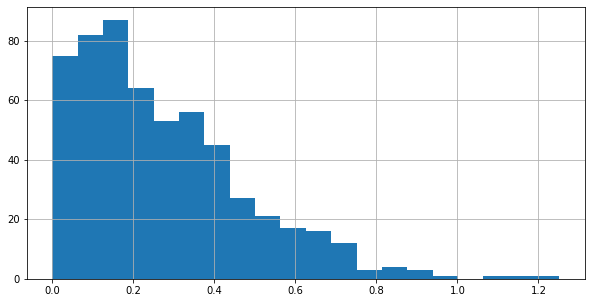

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

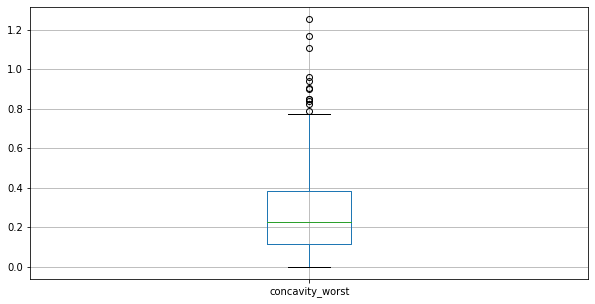

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "concavity_worst",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 0.1, other = 0.1)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.6, other = 0.6)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.1) &\
                                                         (real_input[feature] <= 0.6) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.1) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.6)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.1) &\
                                                      (real_input[feature] <= 0.6) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.1) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.6].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.1)|(real_input[feature] > 0.6))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.1)|(real_input[feature] > 0.6))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature concavity_worst details =


count    569.000000
mean       0.271325
std        0.165782
min        0.100000
25%        0.114500
50%        0.226700
75%        0.382900
max        0.600000
Name: concavity_worst, dtype: float64

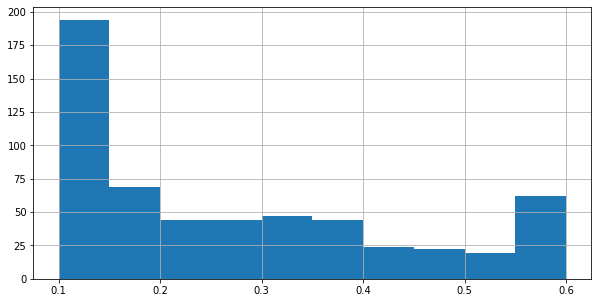

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

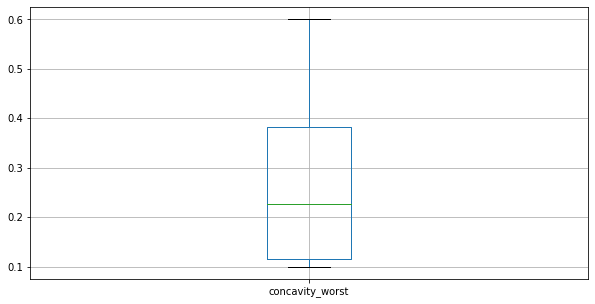

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

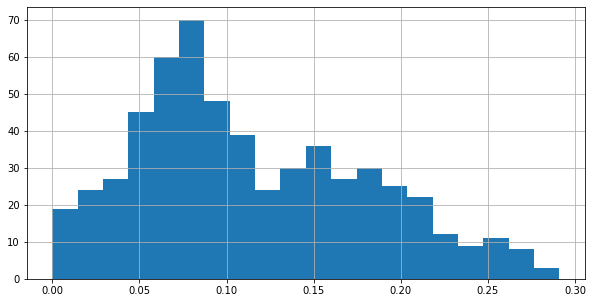

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

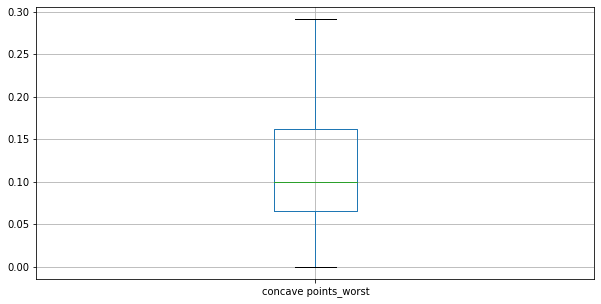

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

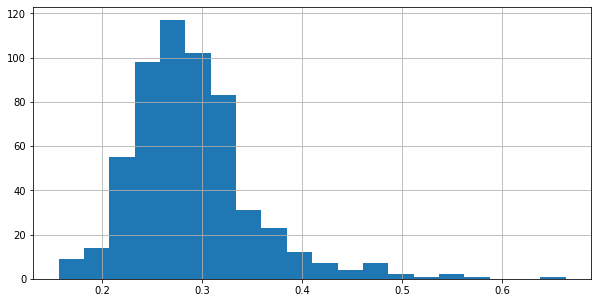

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

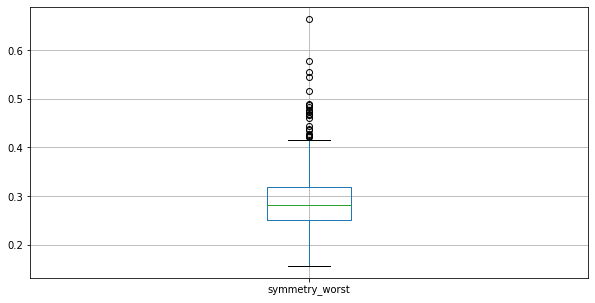

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "symmetry_worst",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

#real_input[feature] = real_input[feature].mask(real_input[feature] < 0.002, other = 0.002)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.4, other = 0.4)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.2) &\
                                                         (real_input[feature] <= 0.4) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.2) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.4)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.2) &\
                                                      (real_input[feature] <= 0.4) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.2) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.4].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.2)|(real_input[feature] > 0.4))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.2)|(real_input[feature] > 0.4))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature symmetry_worst details =


count    569.000000
mean       0.290213
std        0.047786
min        0.202700
25%        0.255100
50%        0.282700
75%        0.317900
max        0.400000
Name: symmetry_worst, dtype: float64

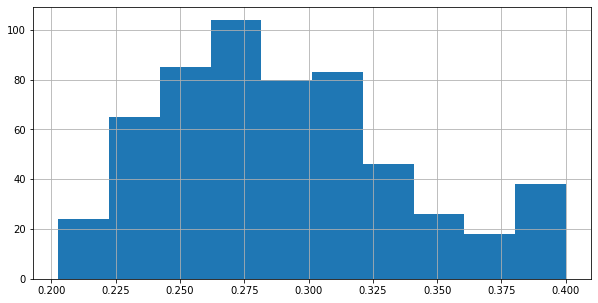

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

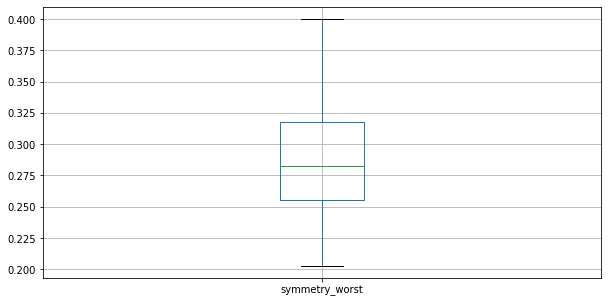

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

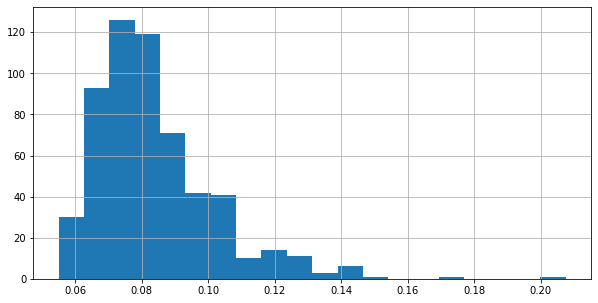

In [ ]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

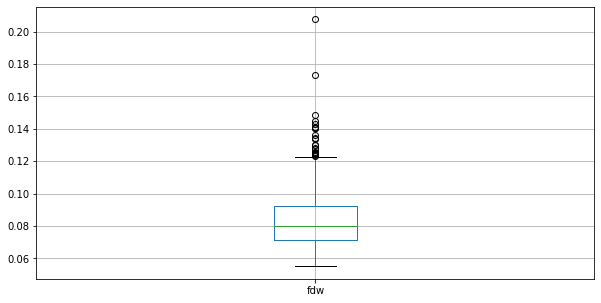

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
'''
For feature "fractal_dimension_worst",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 100 = 100
'''

#real_input[feature] = real_input[feature].mask(real_input[feature] < 0.002, other = 0.002)
real_input[feature] = real_input[feature].mask(real_input[feature] > 0.12, other = 0.12)

# No-Cardiovascular total sum
total_sum_no_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.06) &\
                                                         (real_input[feature] <= 0.12) &\
                                                         (real_output["diagnosis"] == 0)])
# No-Cardiovascular zero_len
zero_len_no_cardiovascular = real_input[feature][(real_input[feature] < 0.06) &\
                                           (real_output["diagnosis"] == 0) &\
                                           (real_input[feature] > 0.12)].size
# No-Cardiovascular dataset size
dataset_len_no_cardiovascular = real_output[(real_output["diagnosis"] == 0)].size
# No-Cardiovascular mean value
mean_value_no_cardiovascular = total_sum_no_cardiovascular / (dataset_len_no_cardiovascular\
                                                  - zero_len_no_cardiovascular)

# Cardiovascular total sum
total_sum_cardiovascular = np.sum(real_input[feature][(real_input[feature] >= 0.06) &\
                                                      (real_input[feature] <= 0.12) &\
                                                      (real_output["diagnosis"] == 1)])
# Cardiovascular zero_len
zero_len_cardiovascular = real_input[feature][(real_input[feature] < 0.06) &\
                                        (real_output["diagnosis"] == 1) &\
                                        (real_input[feature]) > 0.12].size
# Cardiovascular dataset size
dataset_len_cardiovascular = real_output[(real_output["diagnosis"] == 1)].size
# Cardiovascular mean value
mean_value_cardiovascular = total_sum_cardiovascular / (dataset_len_cardiovascular\
                                                  - zero_len_cardiovascular)


# No-Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.06)|(real_input[feature] > 0.12))&\
                                               (real_output["diagnosis"] == 0),\
                                               other = mean_value_no_cardiovascular)
# Cardiovascular
real_input[feature] = real_input[feature].mask(((real_input[feature] < 0.06)|(real_input[feature] > 0.12))&\
                                               (real_output["diagnosis"] == 1),\
                                               other = mean_value_cardiovascular)

In [ ]:
print("feature", feature, "details =")
real_input[feature].describe()

feature fdw details =


count    569.000000
mean       0.083786
std        0.015198
min        0.060250
25%        0.072380
50%        0.080200
75%        0.092080
max        0.120000
Name: fdw, dtype: float64

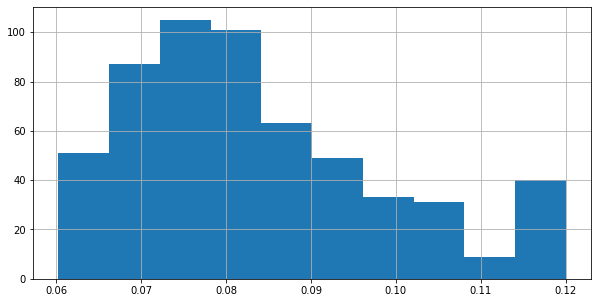

In [ ]:
real_input[feature].hist(figsize = (10, 5), bins = 10)

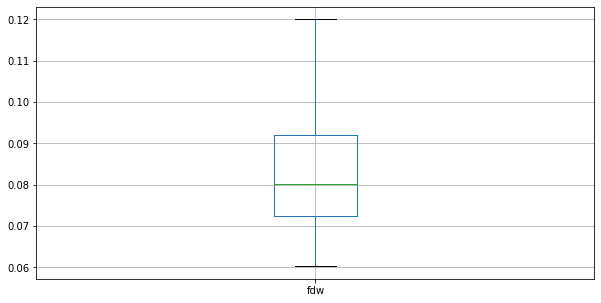

In [ ]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [ ]:
#data normalization
'''    
There are a number of techniques to normalize data such as-
min-max normalization, feature clipping, log scaling, z-score etc.
more information available at -
https://developers.google.com/machine-learning/data-prep/transform/normalization
'''
# min-max equation -
# X = (X - Xmin) / (Xmax - Xmin)
#real_input = (real_input - real_input.min()) / (real_input.max() - real_input.min())
tmp_input  = sk_preprocessing.MinMaxScaler().fit_transform(real_input)
real_input = pd.DataFrame(data = tmp_input, columns = real_input.columns.values.tolist())

real_input

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fdw
0,1.000000,0.000000,0.000000,0.131537,0.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,0.082167,0.160885,1.000000,0.2798,0.975982,0.728833,0.724667,1.000000,0.8386,1.000000,0.099846,1.000000,1.000000,1.000000,1.000000,1.0000,0.912027,1.000000,0.981590
1,0.091138,0.609130,0.000000,0.131537,0.685784,0.000000,0.211250,0.622405,0.624,0.111333,1.000000,0.220741,0.963517,0.915429,0.0450,0.076307,0.143333,0.560000,0.000000,0.3064,0.999333,0.411162,1.000000,1.000000,0.396667,0.288667,0.2832,0.639175,0.366447,0.481506
2,0.091138,0.932224,0.000000,0.131537,0.000000,1.000000,1.000000,1.000000,1.000,0.332667,1.000000,0.220741,0.160885,1.000000,0.2300,0.751313,0.472000,1.000000,0.500000,0.5142,0.904603,0.519713,1.000000,1.000000,0.740000,1.000000,0.7008,0.835052,0.803852,0.457406
3,0.091138,0.851451,0.519006,0.131537,0.000000,1.000000,1.000000,1.000000,1.000,1.000000,0.988674,0.292362,0.980664,0.246143,0.8220,1.000000,0.776833,0.911333,1.000000,1.0000,0.326885,0.569380,0.329292,0.191099,1.000000,1.000000,1.0000,0.884880,1.000000,1.000000
4,0.091138,0.000000,0.000000,0.131537,0.902994,0.754286,1.000000,1.000000,0.618,0.255333,1.000000,0.220741,0.160885,1.000000,1.0000,0.364774,0.781333,0.923333,0.170667,0.6230,0.835891,0.066052,1.000000,0.910702,0.623333,0.350000,0.6000,0.558419,0.170806,0.276653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.091138,0.000000,0.000000,0.131537,0.000000,0.512857,1.000000,1.000000,0.452,0.082000,1.000000,0.376205,0.160885,1.000000,1.0000,0.472354,0.699667,1.000000,0.000000,0.4478,1.000000,0.564260,1.000000,1.000000,0.683333,0.371000,0.6214,0.761512,0.016726,0.182427
565,0.091138,0.000000,0.000000,0.131537,0.850273,0.334286,0.925000,0.973544,0.504,0.022000,1.000000,1.000000,0.160885,1.000000,0.1538,0.355266,0.491667,0.785333,0.265333,0.0996,0.912608,0.477442,1.000000,1.000000,0.276667,0.307333,0.4430,0.559450,0.276229,0.102427
566,0.869920,0.000000,0.974778,0.869762,0.685784,0.318571,0.281375,0.405316,0.180,0.098667,0.887773,0.224449,0.973367,0.550714,0.1806,0.682512,0.621667,0.704667,0.000000,0.3784,0.598399,0.959549,0.694357,0.588513,0.231667,0.698000,0.4806,0.487285,0.096807,0.300418
567,0.091138,0.000000,0.000000,0.131537,0.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,0.660434,0.160885,1.000000,0.3044,1.000000,1.000000,0.776000,0.549333,0.8370,1.000000,0.477442,1.000000,1.000000,1.000000,1.000000,1.0000,0.910653,1.000000,1.000000


In [ ]:
real_input.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fdw
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.00000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.363200,0.418824,0.464674,0.275653,0.616411,0.359013,0.317855,0.385813,0.55677,0.475008,0.580650,0.381960,0.405708,0.346698,0.371623,0.394316,0.333986,0.432657,0.339735,0.319049,0.412785,0.477543,0.409376,0.385882,0.521333,0.499091,0.342650,0.393836,0.443555,0.393900
std,0.323048,0.357416,0.290544,0.279996,0.293876,0.396197,0.415660,0.333320,0.35531,0.332203,0.313195,0.291143,0.245455,0.324903,0.355027,0.294590,0.300863,0.304791,0.342189,0.311797,0.281528,0.246775,0.340303,0.306315,0.311373,0.314716,0.331565,0.225884,0.242200,0.254366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.014882,0.318683,0.000000,0.415698,0.000000,0.000000,0.158966,0.23800,0.180000,0.311197,0.174952,0.160885,0.112143,0.033800,0.157118,0.084833,0.175867,0.010667,0.049600,0.200133,0.307220,0.135674,0.162595,0.276667,0.264000,0.029000,0.223127,0.265585,0.203013
50%,0.464706,0.481935,0.508175,0.131537,0.685784,0.180429,0.000000,0.160759,0.58400,0.436000,0.547490,0.252117,0.359358,0.207571,0.276000,0.328056,0.264833,0.395333,0.248667,0.237400,0.330887,0.477442,0.313419,0.275968,0.521667,0.386000,0.253400,0.343402,0.405474,0.333891
75%,0.620989,0.727041,0.674342,0.475426,0.805144,0.720000,0.758750,0.671392,0.91400,0.741333,0.945689,0.558984,0.580080,0.502714,0.629200,0.560921,0.534167,0.647333,0.565333,0.511600,0.585724,0.649770,0.677304,0.559937,0.766667,0.797000,0.565800,0.554639,0.583882,0.532720
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# data correlation 
real_input.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fdw
radius_mean,1.000000,-0.047115,0.557368,0.858325,-0.047060,0.104150,0.076586,0.097625,-0.071152,-0.192542,0.009533,-0.221155,0.175787,0.029010,-0.319015,-0.016543,0.005767,0.022397,-0.265601,-0.106076,0.201722,0.080350,0.275361,0.157330,-0.030590,0.162578,0.154579,0.191485,0.061764,0.029559
texture_mean,-0.047115,1.000000,-0.000215,-0.026221,-0.050923,0.020603,0.017900,0.018958,0.055599,-0.003542,0.064143,0.042399,0.082285,0.044948,-0.027595,-0.037851,-0.004350,0.007120,0.016584,-0.053096,0.029790,0.200759,0.029519,0.028769,0.040581,0.030424,0.019055,0.038026,0.056047,-0.031657
perimeter_mean,0.557368,-0.000215,1.000000,0.543520,0.061351,-0.186716,-0.336066,-0.388995,-0.100996,0.035985,-0.392430,-0.137935,0.250291,-0.512933,-0.131431,-0.139343,-0.176104,-0.199916,-0.138808,-0.124752,-0.419257,-0.138935,-0.361345,-0.466851,-0.129032,-0.109128,-0.191311,-0.253787,-0.043195,-0.006045
area_mean,0.858325,-0.026221,0.543520,1.000000,-0.097463,0.182116,0.188636,0.201848,0.000539,-0.186616,0.108137,-0.178350,0.140763,0.139890,-0.268445,0.021349,0.079198,0.121368,-0.228958,-0.071911,0.298181,0.140997,0.367115,0.259559,0.030632,0.211016,0.237681,0.286644,0.124255,0.048257
smoothness_mean,-0.047060,-0.050923,0.061351,-0.097463,1.000000,-0.477821,-0.441894,-0.445980,-0.329513,-0.321129,-0.273180,-0.024595,-0.002743,-0.295022,-0.099094,-0.277051,-0.266233,-0.267443,-0.085661,-0.288841,-0.261017,-0.137142,-0.267781,-0.252876,-0.399684,-0.369845,-0.407714,-0.430590,-0.342182,-0.381735
compactness_mean,0.104150,0.020603,-0.186716,0.182116,-0.477821,1.000000,0.852251,0.791055,0.528072,0.483856,0.492760,0.006738,0.044782,0.540367,0.106713,0.683433,0.694695,0.671670,0.108091,0.583152,0.551939,0.275915,0.599739,0.550605,0.519820,0.837853,0.820759,0.790194,0.466961,0.686539
concavity_mean,0.076586,0.017900,-0.336066,0.188636,-0.441894,0.852251,1.000000,0.906774,0.428142,0.241990,0.591153,0.049797,-0.042563,0.704258,0.069441,0.575258,0.691384,0.648665,0.061907,0.440797,0.711414,0.345421,0.746539,0.718522,0.450089,0.741556,0.869141,0.835528,0.420907,0.527793
concave points_mean,0.097625,0.018958,-0.388995,0.201848,-0.445980,0.791055,0.906774,1.000000,0.419338,0.130220,0.655511,-0.012932,-0.094281,0.793841,0.008111,0.430764,0.531844,0.609687,0.020881,0.309477,0.814286,0.331539,0.835979,0.817811,0.439541,0.655526,0.765681,0.861119,0.382461,0.395991
symmetry_mean,-0.071152,0.055599,-0.100996,0.000539,-0.329513,0.528072,0.428142,0.419338,1.000000,0.403232,0.326179,0.090902,0.059812,0.269948,0.195385,0.309128,0.328702,0.354706,0.329320,0.351020,0.194002,0.163606,0.226616,0.202574,0.415336,0.410243,0.403335,0.396187,0.634342,0.396413
fractal_dimension_mean,-0.192542,-0.003542,0.035985,-0.186616,-0.321129,0.483856,0.241990,0.130220,0.403232,1.000000,0.008288,0.144864,0.116224,-0.113181,0.403920,0.463326,0.379480,0.296446,0.284377,0.679167,-0.231969,-0.021875,-0.197901,-0.223666,0.484888,0.391108,0.289060,0.163370,0.295277,0.721475


([<matplotlib.axis.YTick at 0x7f89bbfa9f98>,
 [Text(0, 0, 'radius_mean'),
  Text(0, 0, 'texture_mean'),
  Text(0, 0, 'perimeter_mean'),
  Text(0, 0, 'area_mean'),
  Text(0, 0, 'smoothness_mean'),
  Text(0, 0, 'compactness_mean'),
  Text(0, 0, 'concavity_mean'),
  Text(0, 0, 'concave points_mean'),
  Text(0, 0, 'symmetry_mean'),
  Text(0, 0, 'fractal_dimension_mean'),
  Text(0, 0, 'radius_se'),
  Text(0, 0, 'texture_se'),
  Text(0, 0, 'perimeter_se'),
  Text(0, 0, 'area_se'),
  Text(0, 0, 'smoothness_se'),
  Text(0, 0, 'compactness_se'),
  Text(0, 0, 'concavity_se'),
  Text(0, 0, 'concave points_se'),
  Text(0, 0, 'symmetry_se'),
  Text(0, 0, 'fractal_dimension_se'),
  Text(0, 0, 'radius_worst'),
  Text(0, 0, 'texture_worst'),
  Text(0, 0, 'perimeter_worst'),
  Text(0, 0, 'area_worst'),
  Text(0, 0, 'smoothness_worst'),
  Text(0, 0, 'compactness_worst'),
  Text(0, 0, 'concavity_worst'),
  Text(0, 0, 'concave points_worst'),
  Text(0, 0, 'symmetry_worst'),
  Text(0, 0, 'fdw')])

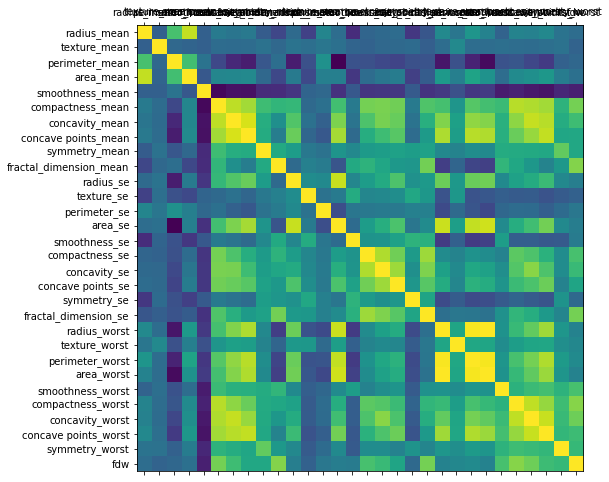

In [ ]:
# graphical representation of data correlation
# data correlation means dependency of data among each others i.e.
# dependency of attributes among each other
'''
data correlation formula between two attributes (data columns) X and Y -

            Σ(X - Xmean) * Σ(Y - Ymean) 
corr = -------------------------------------
       sqrt(Σ(X - Xmean)^2 * Σ(Y - Ymean)^2)
       
'''
plt.matshow(real_input.corr())
plt.xticks(ticks = np.arange(real_input.columns.size), labels = real_input.columns)
plt.yticks(ticks = np.arange(real_input.columns.size), labels = real_input.columns)

In [ ]:
# split real_input and real_output into train and test input, output taking
# 70:30 train:test 
train_input, test_input, train_output, test_output = sk_model.train_test_split(real_input,\
                                                                                real_output,\
                                                                                train_size = 0.60)
train_input.shape, test_input.shape, train_output.shape, test_output.shape

((341, 30), (228, 30), (341, 1), (228, 1))

In [ ]:
'''
Tensor-Flow Keras Neural Network model life-cycle.
1. Define the model,
2. Compile the model,
3. Fit the model,
4. Evaluate the model,
5. Predict the model.
'''

'\nTensor-Flow Keras Neural Network model life-cycle.\n1. Define the model,\n2. Compile the model,\n3. Fit the model,\n4. Evaluate the model,\n5. Predict the model.\n'

In [ ]:
# Define model1
h1, h2 = 8, 12
o = 1
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(h1, activation = 'tanh',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model1.add(tf.keras.layers.Dense(h2, activation = 'tanh',\
                                kernel_initializer = 'glorot_uniform'))
model1.add(tf.keras.layers.Dense(o, activation = 'tanh',\
                                kernel_initializer = 'glorot_uniform'))

In [ ]:
# Define model2
h1, h2 = 8, 12
o = 1
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(h1, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model2.add(tf.keras.layers.Dense(h2, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform'))
model2.add(tf.keras.layers.Dense(o, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform'))

In [ ]:
# Define model3
h1, h2 = 8, 12
o = 1
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(h1, activation = 'softplus',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model3.add(tf.keras.layers.Dense(h2, activation = 'softplus',\
                                kernel_initializer = 'glorot_uniform'))
model3.add(tf.keras.layers.Dense(o, activation = 'softplus',\
                                kernel_initializer = 'glorot_uniform'))

In [ ]:
# Define model4
h1, h2 = 8, 12
o = 1
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(h1, activation = 'relu',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model4.add(tf.keras.layers.Dense(h2, activation = 'relu',\
                                kernel_initializer = 'glorot_uniform'))
model4.add(tf.keras.layers.Dense(o, activation = 'sigmoid',\
                                kernel_initializer = 'glorot_uniform'))

In [ ]:
# Define model5
h1, h2 = 8, 12
o = 1
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Dense(h1, activation = 'swish',\
                                kernel_initializer = 'glorot_uniform',\
                                input_shape = (train_input.shape[1],)))
model5.add(tf.keras.layers.Dense(h2, activation = 'swish',\
                                kernel_initializer = 'glorot_uniform'))
model5.add(tf.keras.layers.Dense(o, activation = 'swish',\
                                kernel_initializer = 'glorot_uniform'))

In [ ]:
# Compile model1
opt1 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model1.compile(optimizer=opt1, loss='mse', metrics=['binary_accuracy'])

In [ ]:
# Compile model2
opt2 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model2.compile(optimizer=opt2, loss='mse', metrics=['binary_accuracy'])

In [ ]:
# Compile model3
opt3 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model3.compile(optimizer=opt3, loss='mse', metrics=['binary_accuracy'])

In [ ]:
# Compile model4
opt4 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model4.compile(optimizer=opt4, loss='mse', metrics=['binary_accuracy'])

In [ ]:
# Compile model5
opt5 = tf.keras.optimizers.SGD(learning_rate = .001,\
                              momentum = 0.0)
model5.compile(optimizer=opt5, loss='mse', metrics=['binary_accuracy'])

In [ ]:
# Fit the model1
st1 = time.time()
train_history1 = model1.fit(train_input, train_output,\
                          epochs=10000, batch_size=train_output.size,\
                          verbose = 0) 
en1 = time.time()
en1 - st1

17.136290550231934

In [ ]:
# Fit the model2
st2 = time.time()
train_history2 = model2.fit(train_input, train_output,\
                          epochs=10000, batch_size=train_output.size,\
                          verbose = 0) 
en2 = time.time()
en2 - st2

17.243950843811035

In [ ]:
# Fit the model3
st3 = time.time()
train_history3 = model3.fit(train_input, train_output,\
                          epochs=10000, batch_size=train_output.size,\
                          verbose = 0) 
en3 = time.time()
en3 - st3


18.1892831325531

In [ ]:
# Fit the model4
st4 = time.time()
train_history4 = model4.fit(train_input, train_output,\
                          epochs=10000, batch_size=train_output.size,\
                          verbose = 0) 
en4 = time.time()
en4 - st4

17.412326335906982

In [ ]:
# Fit the model5
st5 = time.time()
train_history5 = model5.fit(train_input, train_output,\
                          epochs=10000, batch_size=train_output.size,\
                          verbose = 0) 
en5 = time.time()
en5 - st5

17.71217942237854

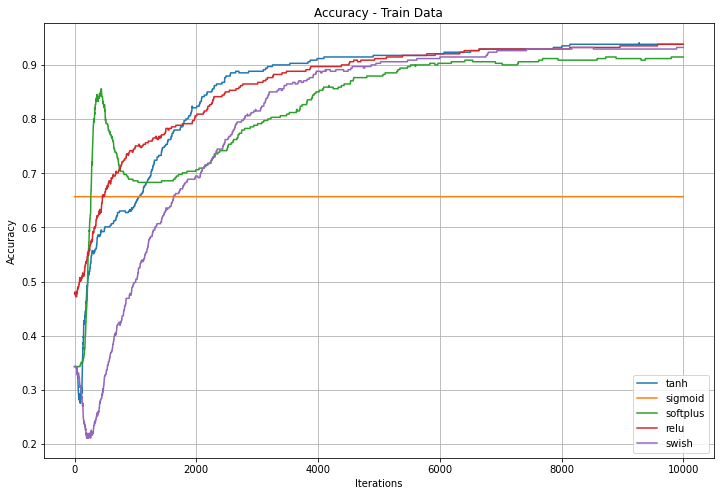

In [ ]:
# graph plot - Train Data (accuracy) 
plt.plot(train_history1.history['binary_accuracy'], label = 'tanh')
plt.plot(train_history2.history['binary_accuracy'], label = 'sigmoid')
plt.plot(train_history3.history['binary_accuracy'], label = 'softplus')
plt.plot(train_history4.history['binary_accuracy'], label = 'relu')
plt.plot(train_history5.history['binary_accuracy'], label = 'swish')
plt.grid(True)
plt.title("Accuracy - Train Data")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

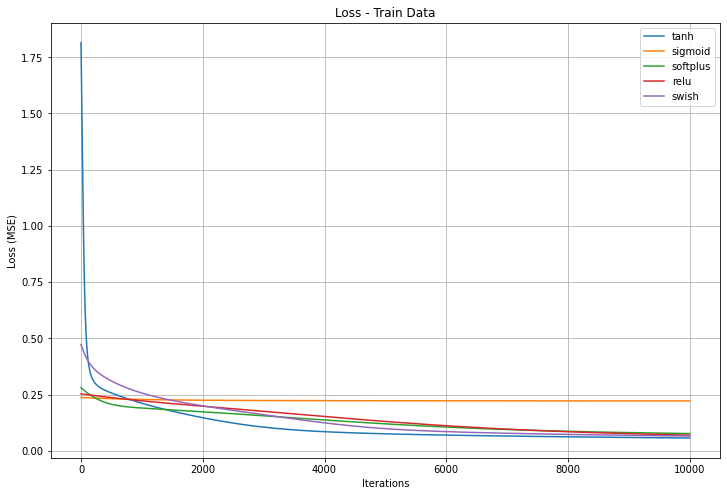

In [ ]:
# graph plot - Train Data (loss) 
plt.plot(train_history1.history['loss'], label = 'tanh')
plt.plot(train_history2.history['loss'], label = 'sigmoid')
plt.plot(train_history3.history['loss'], label = 'softplus')
plt.plot(train_history4.history['loss'], label = 'relu')
plt.plot(train_history5.history['loss'], label = 'swish')
plt.grid(True)
plt.title("Loss - Train Data")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

In [ ]:
# evaluate the model1 - tanh
cost1, test_accuracy1 = model1.evaluate(test_input, test_output, verbose=0)
cost1, test_accuracy1

(0.06425854563713074, 0.9122806787490845)

In [ ]:
# evaluate the model2 - sigmoid
cost2, test_accuracy2 = model2.evaluate(test_input, test_output, verbose=0)
cost2, test_accuracy2

(0.2446909248828888, 0.5833333134651184)

In [ ]:
# evaluate the model3 - softplus
cost3, test_accuracy3 = model3.evaluate(test_input, test_output, verbose=0)
cost3, test_accuracy3

(0.08152318745851517, 0.9035087823867798)

In [ ]:
# evaluate the model4 - relu
cost4, test_accuracy4 = model4.evaluate(test_input, test_output, verbose=0)
cost4, test_accuracy4

(0.07319473475217819, 0.9166666865348816)

In [ ]:
# evaluate the model5 - swish
cost5, test_accuracy5 = model5.evaluate(test_input, test_output, verbose=0)
cost5, test_accuracy5

(0.06369294226169586, 0.9385964870452881)

In [ ]:
# predict the model1 - tanh
predict_output1 = model1.predict(test_input)
predict_output1 = np.where(predict_output1 < 0.5, 0, 1).flatten()

In [ ]:
# predict the model2 - sigmoid
predict_output2 = model2.predict(test_input)
predict_output2 = np.where(predict_output2 < 0.5, 0, 1).flatten()

In [ ]:
# predict the model3 - softplus
predict_output3 = model3.predict(test_input)
predict_output3 = np.where(predict_output3 < 0.5, 0, 1).flatten()

In [ ]:
# predict the model4 - relu
predict_output4 = model4.predict(test_input)
predict_output4 = np.where(predict_output4 < 0.5, 0, 1).flatten()

In [ ]:
# predict the model5 - swish
predict_output5 = model5.predict(test_input)
predict_output5 = np.where(predict_output5 < 0.5, 0, 1).flatten()

In [ ]:
# confusion matrix1 - tanh
confusion_matrix1 = sk_metrics.confusion_matrix(np.array(test_output).flatten(),\
                                             predict_output1)
confusion_matrix1

array([[ 78,  17],
       [  3, 130]])

In [ ]:
# confusion matrix2 - sigmoid
confusion_matrix2 = sk_metrics.confusion_matrix(np.array(test_output).flatten(),\
                                             predict_output2)
confusion_matrix2

array([[  0,  95],
       [  0, 133]])

In [ ]:
# confusion matrix3 - softplus
confusion_matrix3 = sk_metrics.confusion_matrix(np.array(test_output).flatten(),\
                                             predict_output3)
confusion_matrix3

array([[ 78,  17],
       [  5, 128]])

In [ ]:
# confusion matrix4 - relu
confusion_matrix4 = sk_metrics.confusion_matrix(np.array(test_output).flatten(),\
                                             predict_output4)
confusion_matrix4

array([[ 79,  16],
       [  3, 130]])

In [ ]:
# confusion matrix5 - swish
confusion_matrix5 = sk_metrics.confusion_matrix(np.array(test_output).flatten(),\
                                             predict_output5)
confusion_matrix5

array([[ 84,  11],
       [  3, 130]])

In [ ]:
# classification report1 - classwise recall, precision - tanh
classification_report1 = sk_metrics.classification_report(np.array(test_output).flatten(), predict_output1)
print(classification_report1)

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        95
           1       0.88      0.98      0.93       133

    accuracy                           0.91       228
   macro avg       0.92      0.90      0.91       228
weighted avg       0.92      0.91      0.91       228



In [ ]:
# classification report2 - classwise recall, precision - sigmoid
classification_report2 = sk_metrics.classification_report(np.array(test_output).flatten(), predict_output2)
print(classification_report2)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        95
           1       0.58      1.00      0.74       133

    accuracy                           0.58       228
   macro avg       0.29      0.50      0.37       228
weighted avg       0.34      0.58      0.43       228



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# classification report3 - classwise recall, precision - softplus
classification_report3 = sk_metrics.classification_report(np.array(test_output).flatten(), predict_output3)
print(classification_report3)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        95
           1       0.88      0.96      0.92       133

    accuracy                           0.90       228
   macro avg       0.91      0.89      0.90       228
weighted avg       0.91      0.90      0.90       228



In [ ]:
# classification report4 - classwise recall, precision - relu
classification_report4 = sk_metrics.classification_report(np.array(test_output).flatten(), predict_output4)
print(classification_report4)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89        95
           1       0.89      0.98      0.93       133

    accuracy                           0.92       228
   macro avg       0.93      0.90      0.91       228
weighted avg       0.92      0.92      0.92       228



In [ ]:
# classification report5 - classwise recall, precision - swish
classification_report5 = sk_metrics.classification_report(np.array(test_output).flatten(), predict_output5)
print(classification_report5)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        95
           1       0.92      0.98      0.95       133

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.94      0.94      0.94       228



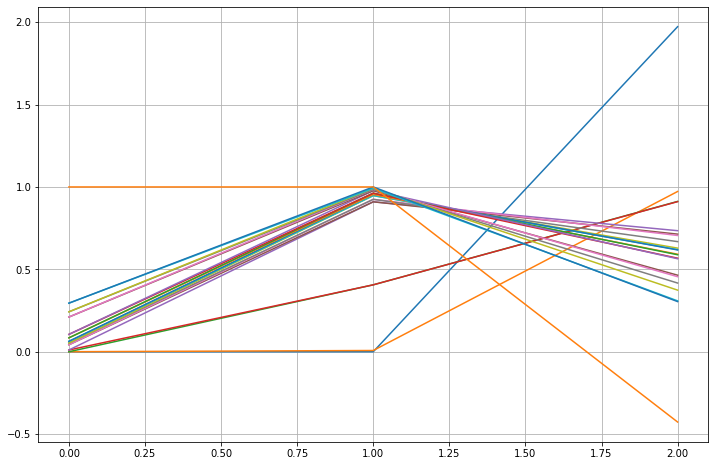

In [ ]:
# ROC1 (Receiver Operating Characteristics) curve - tanh
ROC_curve1 = sk_metrics.roc_curve(np.array(test_output).flatten(), model1.predict(test_input).flatten())
plt.plot(ROC_curve1)
plt.grid(True)

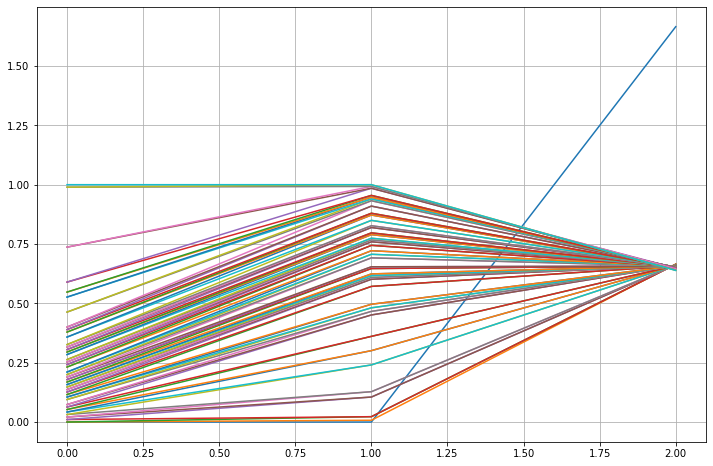

In [ ]:
# ROC2 (Receiver Operating Characteristics) curve - sigmoid
ROC_curve2 = sk_metrics.roc_curve(np.array(test_output).flatten(), model2.predict(test_input).flatten())
plt.plot(ROC_curve2)
plt.grid(True)

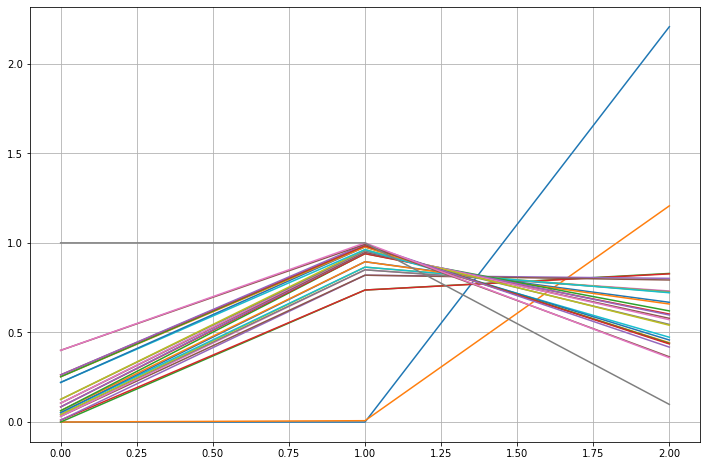

In [ ]:
# ROC3 (Receiver Operating Characteristics) curve - softplus
ROC_curve3 = sk_metrics.roc_curve(np.array(test_output).flatten(), model3.predict(test_input).flatten())
plt.plot(ROC_curve3)
plt.grid(True)

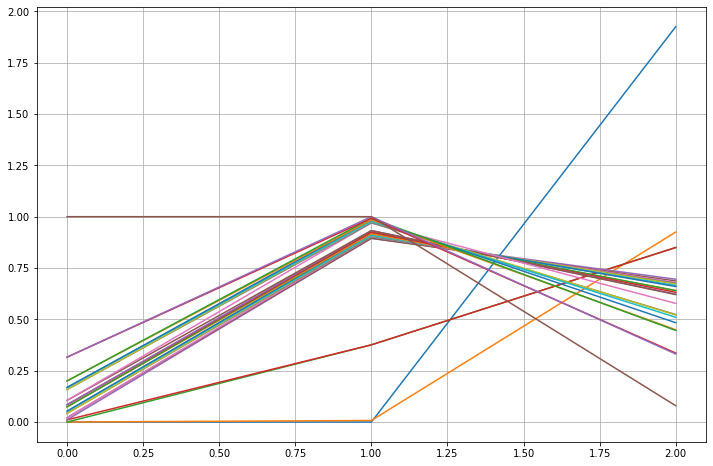

In [ ]:
# ROC4 (Receiver Operating Characteristics) curve - relu
ROC_curve4 = sk_metrics.roc_curve(np.array(test_output).flatten(), model4.predict(test_input).flatten())
plt.plot(ROC_curve4)
plt.grid(True)

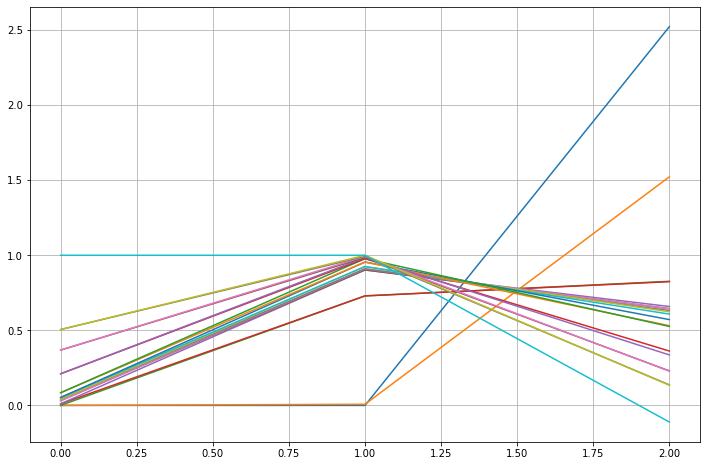

In [ ]:
# ROC5 (Receiver Operating Characteristics) curve - swish
ROC_curve5 = sk_metrics.roc_curve(np.array(test_output).flatten(), model5.predict(test_input).flatten())
plt.plot(ROC_curve5)
plt.grid(True)